In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.collections import LineCollection

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

sns.set()

In [2]:
#Ne pas afficher les alertes
import warnings
warnings.simplefilter("ignore")

In [3]:
#Instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)

In [4]:
df_total = pd.read_csv("df_total.csv", sep=";", index_col=0)

In [5]:
df_total.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%)  
Zone                                     
Afghanistan                   41.445901  
Afrique du Sud                41.017081  
Albanie                       25.956031  
Algérie                       31.827503  
Allemagne                     30.207384

In [6]:
df_total.shape

(164, 10)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">ACP</h3>
</div>

In [7]:
df_total_ACP = df_total.copy()

In [8]:
X_acp = df_total_ACP.values
X_acp[:3]

array([[3.62961130e+07, 1.90343028e+04, 5.34020133e+02, 2.89287175e+01,
        1.51390000e+04, 1.16090000e+04, 4.55500000e+03, 1.25495532e+02,
        3.57310000e+02, 4.14459011e+01],
       [5.70097560e+07, 3.80851444e+05, 6.72392858e+03, 5.43766579e+00,
        6.68400000e+04, 6.84550000e+04, 9.02000000e+03, 1.58218534e+02,
        5.56420000e+02, 4.10170809e+01],
       [2.88416900e+06, 1.30197299e+04, 4.52175222e+03, 3.46720320e+00,
        4.87900000e+03, 4.23100000e+03, 8.84000000e+02, 3.06500763e+02,
        1.26049000e+03, 2.59560305e+01]])

In [9]:
type(X_acp)

numpy.ndarray

In [10]:
X_acp.shape

(164, 10)

In [11]:
names_acp = df_total_ACP.index
names_acp

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=164)

In [12]:
features_acp = df_total_ACP.columns
features_acp

Index(['Habitants', 'PIB_pays(Millions_USD)', 'PIB_pays_hab',
       'Taux_sous_nut(%)', 'Disponibilité intérieure', 'Production',
       'Importations - Quantité', 'Import_hab_kg',
       'Disponibilité alimentaire(kg/personne/an)', 'Taux_dispo_prot_alim(%)'],
      dtype='object')

In [13]:
# Commençons par scaler les données. On instancie :
scaler_acp = StandardScaler()

In [14]:
# On fit et transforme :
X_acp_scaled = scaler_acp.fit_transform(X_acp)
X_acp_scaled[:3]

array([[ 0.29816119, -0.38307913, -0.69659913,  2.05235765, -0.31738252,
        -0.3629804 , -0.17974882, -0.73032191, -1.6466205 ,  1.25956109],
       [ 0.81598395,  0.19278373, -0.37108682, -0.1571658 ,  0.55976856,
         0.5418674 ,  0.2369995 , -0.65170709, -0.64841605,  1.19414118],
       [-0.53710786, -0.39265184, -0.48689395, -0.34250374, -0.49145207,
        -0.48041992, -0.5223878 , -0.29546897,  2.88132031, -1.10354106]])

In [15]:
# On vérifie la moyenne à 0 et l'écart type à 1 :
idx_acp = ["mean", "std"]

pd.DataFrame(X_acp_scaled).describe().round(4).loc[idx_acp, :]

0       1       2       3       4       5       6       7       8  \
mean -0.0000  0.0000  0.0000 -0.0000  0.0000  0.0000 -0.0000 -0.0000  0.0000   
std   1.0031  1.0031  1.0031  1.0031  1.0031  1.0031  1.0031  1.0031  1.0031   

           9  
mean  0.0000  
std   1.0031

In [16]:
nb_colonnes_acp = df_total_ACP.shape[1]
nb_colonnes_acp

10

In [17]:
# On travaille sur les composantes
n_components_acp = nb_colonnes_acp

In [18]:
# On instancie l'ACP
pca_acp = PCA(n_components=n_components_acp)

In [19]:
# On l'entraine sur les données scalées :
pca_acp.fit(X_acp_scaled)

PCA(n_components=10)

In [20]:
pca_acp.explained_variance_ratio_

array([0.38238163, 0.26781423, 0.1308534 , 0.07312374, 0.05665446,
       0.042183  , 0.02279502, 0.01512464, 0.00845552, 0.00061435])

In [21]:
# Donc 1ere composante : 38.24% et la 2eme composante : 26.78%
# On enregistre dans une variable :
scree_acp = (pca_acp.explained_variance_ratio_*100).round(2)
scree_acp

array([38.24, 26.78, 13.09,  7.31,  5.67,  4.22,  2.28,  1.51,  0.85,
        0.06])

In [22]:
# Variable cumulées :
scree_cum_acp = scree_acp.cumsum().round()
scree_cum_acp

array([ 38.,  65.,  78.,  85.,  91.,  95.,  98.,  99., 100., 100.])

In [23]:
# Variable de liste de composantes
x_list_acp = range(1, n_components_acp+1)
list(x_list_acp)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

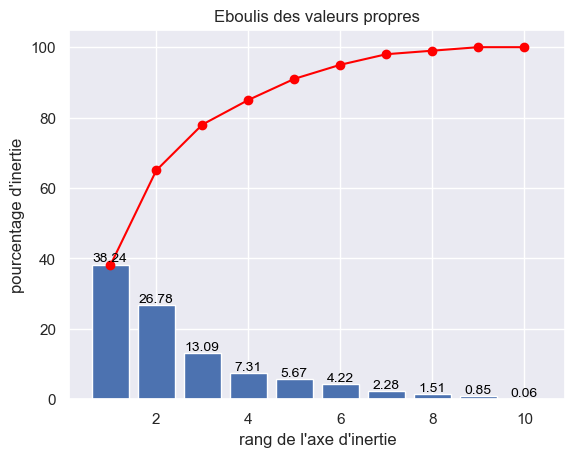

In [24]:
plt.bar(x_list_acp, scree_acp)
plt.plot(x_list_acp, scree_cum_acp,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.show(block=False)

In [25]:
# Variance en colonne bleue et valeur cumulée en rouge

In [26]:
# Composantes :

In [27]:
pcs_acp = pd.DataFrame(pca_acp.components_)
pcs_acp

0         1         2         3         4         5         6  \
0  0.423807  0.401587  0.120119 -0.102540  0.469441  0.449899  0.433555   
1 -0.259271  0.114466  0.464328 -0.401398 -0.179439 -0.172150  0.095251   
2 -0.016574  0.203795  0.244102  0.067173 -0.089281 -0.128443  0.190568   
3 -0.128986  0.404886  0.111852  0.702114 -0.190979 -0.245975  0.318310   
4 -0.190209  0.468620 -0.376690 -0.506536 -0.199844 -0.246899  0.261418   
5  0.042258 -0.200380 -0.651148  0.007817  0.007573 -0.082055  0.368701   
6 -0.170674 -0.014892 -0.256018  0.265947  0.011426  0.070207  0.036186   
7  0.756871 -0.181727  0.086925 -0.040222 -0.218601 -0.514959  0.112577   
8  0.265255  0.571465 -0.242519  0.042997 -0.062557 -0.024713 -0.661450   
9 -0.161078  0.024176  0.008306  0.007378  0.781765 -0.593751 -0.097681   

          7         8         9  
0  0.029823  0.144964 -0.038919  
1  0.485708  0.464084 -0.144088  
2  0.260288 -0.397318  0.779550  
3 -0.012504  0.000593 -0.339853  
4 -0.414357 -0.068505  0.011010  
5  0.619438 -0.043589 -0.075324  
6 -0.165293  0.744600  0.496242  
7 -0.131224  0.199473  0.047924  
8  0.308793  0.069849  0.011436  
9 -0.001244  0.007636  0.006909

In [28]:
pcs_acp.columns = features_acp
pcs_acp.index = [f"F{i}" for i in x_list_acp]
pcs_acp.round(2)

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  Taux_sous_nut(%)  \
F1        0.42                    0.40          0.12             -0.10   
F2       -0.26                    0.11          0.46             -0.40   
F3       -0.02                    0.20          0.24              0.07   
F4       -0.13                    0.40          0.11              0.70   
F5       -0.19                    0.47         -0.38             -0.51   
F6        0.04                   -0.20         -0.65              0.01   
F7       -0.17                   -0.01         -0.26              0.27   
F8        0.76                   -0.18          0.09             -0.04   
F9        0.27                    0.57         -0.24              0.04   
F10      -0.16                    0.02          0.01              0.01   

     Disponibilité intérieure  Production  Importations - Quantité  \
F1                       0.47        0.45                     0.43   
F2                      -0.18       -0.17                     0.10   
F3                      -0.09       -0.13                     0.19   
F4                      -0.19       -0.25                     0.32   
F5                      -0.20       -0.25                     0.26   
F6                       0.01       -0.08                     0.37   
F7                       0.01        0.07                     0.04   
F8                      -0.22       -0.51                     0.11   
F9                      -0.06       -0.02                    -0.66   
F10                      0.78       -0.59                    -0.10   

     Import_hab_kg  Disponibilité alimentaire(kg/personne/an)  \
F1            0.03                                       0.14   
F2            0.49                                       0.46   
F3            0.26                                      -0.40   
F4           -0.01                                       0.00   
F5           -0.41                                      -0.07   
F6            0.62                                      -0.04   
F7           -0.17                                       0.74   
F8           -0.13                                       0.20   
F9            0.31                                       0.07   
F10          -0.00                                       0.01   

     Taux_dispo_prot_alim(%)  
F1                     -0.04  
F2                     -0.14  
F3                      0.78  
F4                     -0.34  
F5                      0.01  
F6                     -0.08  
F7                      0.50  
F8                      0.05  
F9                      0.01  
F10                     0.01

In [29]:
# On peut ainsi calculer F1, F2, etc (F1= Habitants*sa_valeur +...+ Taux_dispo_prot_alim(%)*sa_valeur)

In [30]:
pcs_acp.T

F1        F2        F3  \
Habitants                                  0.423807 -0.259271 -0.016574   
PIB_pays(Millions_USD)                     0.401587  0.114466  0.203795   
PIB_pays_hab                               0.120119  0.464328  0.244102   
Taux_sous_nut(%)                          -0.102540 -0.401398  0.067173   
Disponibilité intérieure                   0.469441 -0.179439 -0.089281   
Production                                 0.449899 -0.172150 -0.128443   
Importations - Quantité                    0.433555  0.095251  0.190568   
Import_hab_kg                              0.029823  0.485708  0.260288   
Disponibilité alimentaire(kg/personne/an)  0.144964  0.464084 -0.397318   
Taux_dispo_prot_alim(%)                   -0.038919 -0.144088  0.779550   

                                                 F4        F5        F6  \
Habitants                                 -0.128986 -0.190209  0.042258   
PIB_pays(Millions_USD)                     0.404886  0.468620 -0.200380   
PIB_pays_hab                               0.111852 -0.376690 -0.651148   
Taux_sous_nut(%)                           0.702114 -0.506536  0.007817   
Disponibilité intérieure                  -0.190979 -0.199844  0.007573   
Production                                -0.245975 -0.246899 -0.082055   
Importations - Quantité                    0.318310  0.261418  0.368701   
Import_hab_kg                             -0.012504 -0.414357  0.619438   
Disponibilité alimentaire(kg/personne/an)  0.000593 -0.068505 -0.043589   
Taux_dispo_prot_alim(%)                   -0.339853  0.011010 -0.075324   

                                                 F7        F8        F9  \
Habitants                                 -0.170674  0.756871  0.265255   
PIB_pays(Millions_USD)                    -0.014892 -0.181727  0.571465   
PIB_pays_hab                              -0.256018  0.086925 -0.242519   
Taux_sous_nut(%)                           0.265947 -0.040222  0.042997   
Disponibilité intérieure                   0.011426 -0.218601 -0.062557   
Production                                 0.070207 -0.514959 -0.024713   
Importations - Quantité                    0.036186  0.112577 -0.661450   
Import_hab_kg                             -0.165293 -0.131224  0.308793   
Disponibilité alimentaire(kg/personne/an)  0.744600  0.199473  0.069849   
Taux_dispo_prot_alim(%)                    0.496242  0.047924  0.011436   

                                                F10  
Habitants                                 -0.161078  
PIB_pays(Millions_USD)                     0.024176  
PIB_pays_hab                               0.008306  
Taux_sous_nut(%)                           0.007378  
Disponibilité intérieure                   0.781765  
Production                                -0.593751  
Importations - Quantité                   -0.097681  
Import_hab_kg                             -0.001244  
Disponibilité alimentaire(kg/personne/an)  0.007636  
Taux_dispo_prot_alim(%)                    0.006909

In [31]:
custom_colorscale = [[0, "#3b4cc0"], [0.48, "#EEEEEE"], [1, "#b60b27"]]
fig = px.imshow(pcs_acp.T,
                color_continuous_scale=custom_colorscale,
                text_auto=".2f",
                title="Heatmap",
                labels={"x":"Colonnes", "y":"Lignes"},
                aspect=1)
fig.update_layout(
    xaxis={"title": ""},
    yaxis={"title": ""},
    title_x=0.5,
    title_font=dict(size=24, color="#004d40")
)
fig.show()

In [32]:
# Corrélations graphiques

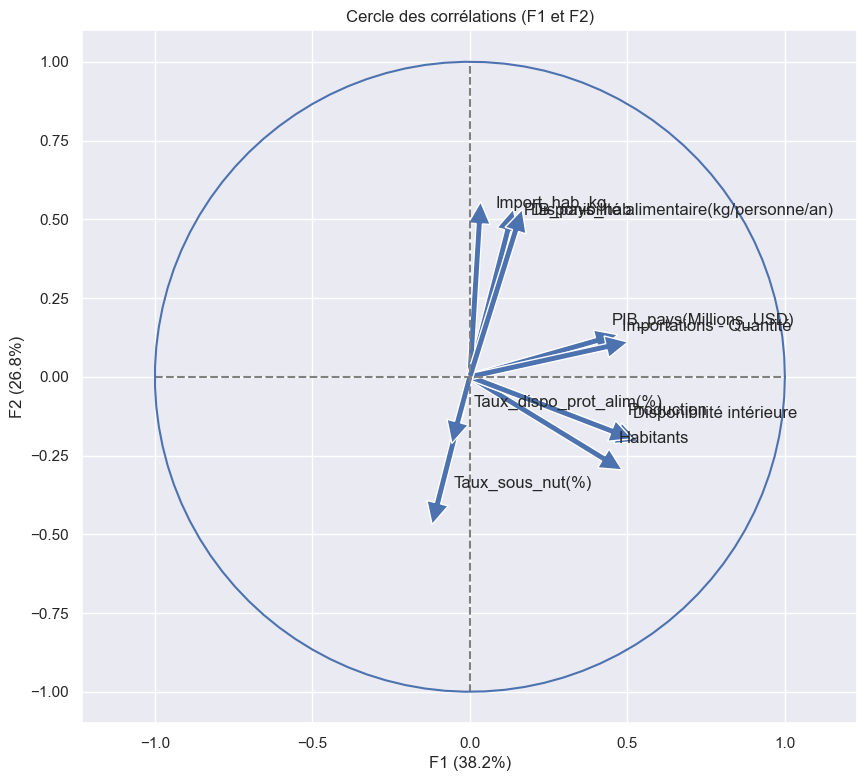

In [33]:
# Fait avec la methode fonction :
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca_acp.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca_acp.components_[x, i],  
                pca_acp.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca_acp.components_[x, i] + 0.05,
                pca_acp.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Le titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

# Pour F1 et F2 :
correlation_graph(pca_acp, (0,1), features_acp)

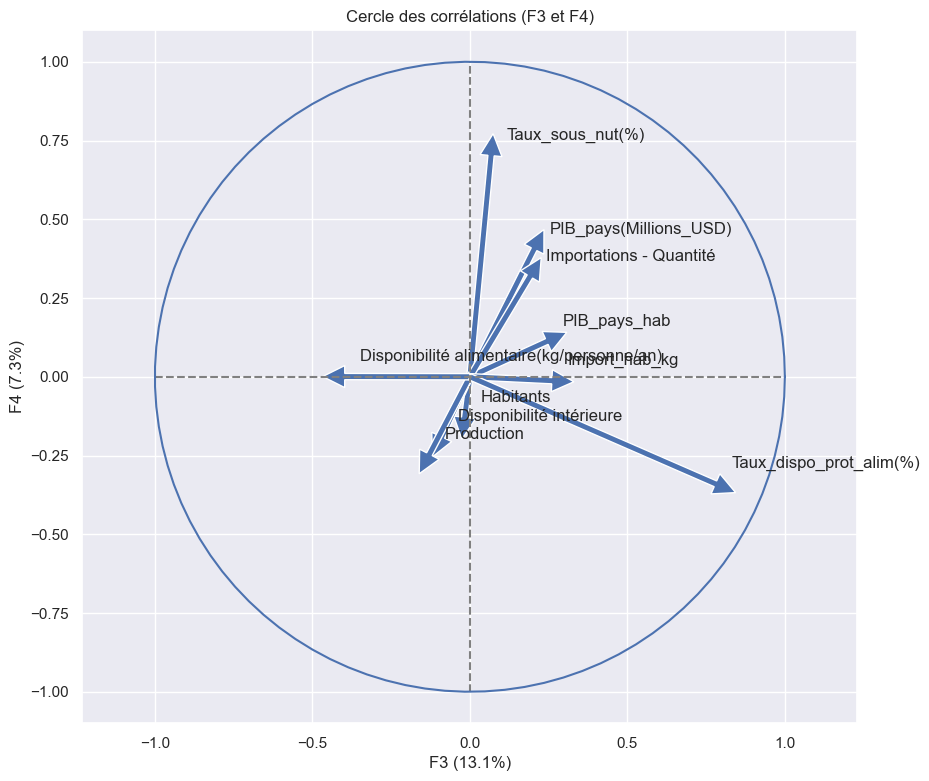

In [34]:
# Pour F3 et F4 :
correlation_graph(pca_acp, (2,3), features_acp)

In [35]:
# Projection

In [36]:
X_acp_proj = pca_acp.transform(X_acp_scaled)
X_acp_proj[:3]

array([[-1.02132994, -2.46648235,  1.37154404,  0.84228415, -0.47808203,
         0.04461014,  0.16305191,  0.2159912 , -0.06105341, -0.06593586],
       [ 0.84418852, -1.25938697,  0.86910117, -0.74186799,  0.2984402 ,
        -0.18196151,  0.18157831,  0.19530684, -0.0281979 , -0.03418439],
       [-0.63018529,  1.47951553, -2.28891793,  0.04155443,  0.26821761,
        -0.01205554,  1.71948358,  0.49293931,  0.2220445 ,  0.03727393]])

In [37]:
x_y = (0,1)
x_y

(0, 1)

In [38]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

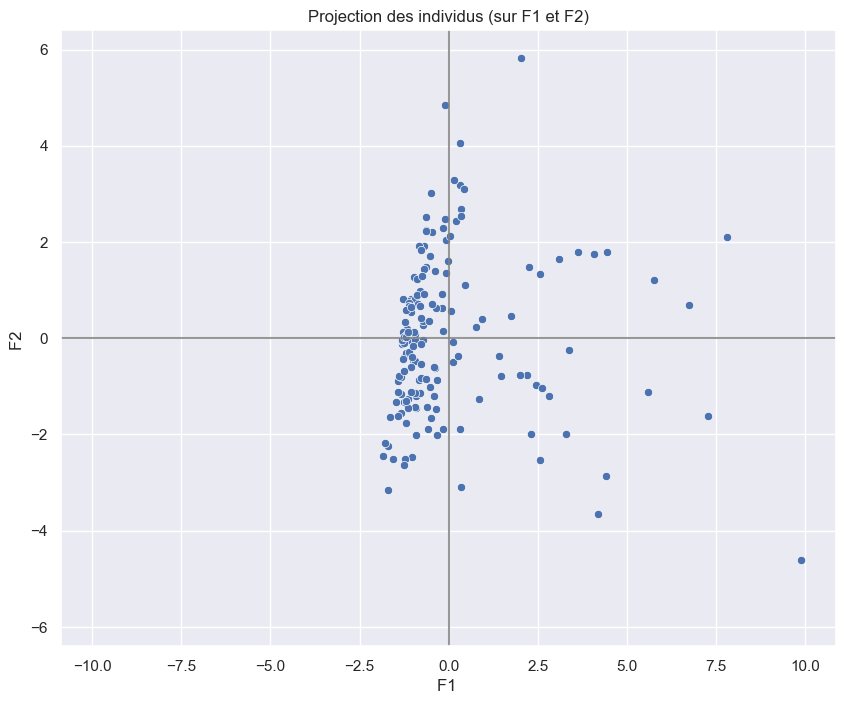

In [39]:
x_y = [0,1]
display_factorial_planes(X_acp_proj, x_y)

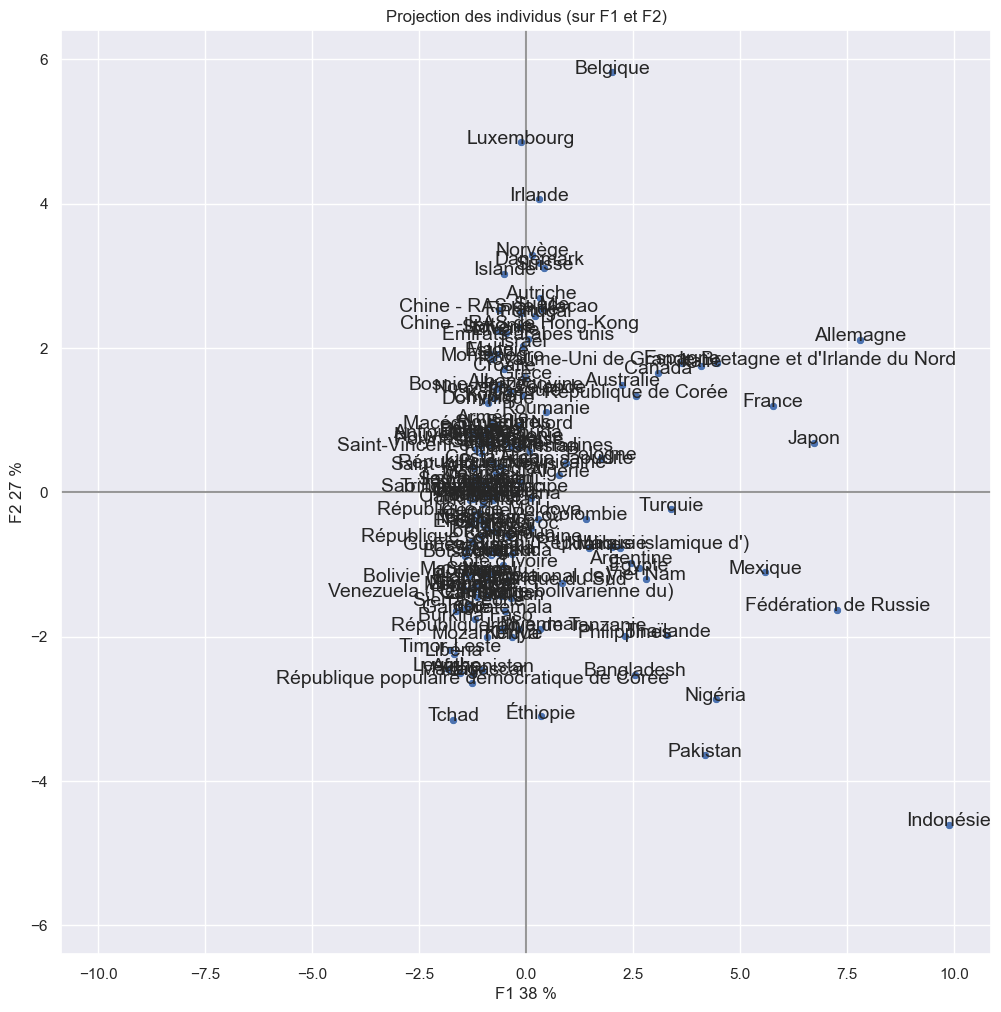

In [40]:
x_y = [0,1]
display_factorial_planes(X_acp_proj, x_y, pca_acp, labels=names_acp, figsize=(12,12))

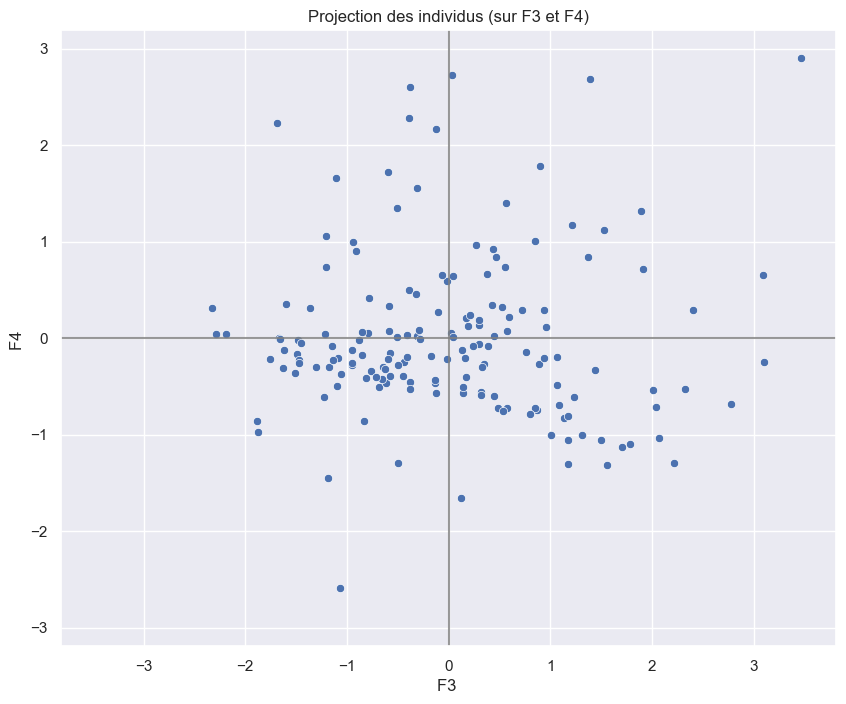

In [41]:
x_y = [2,3]
display_factorial_planes(X_acp_proj, x_y)

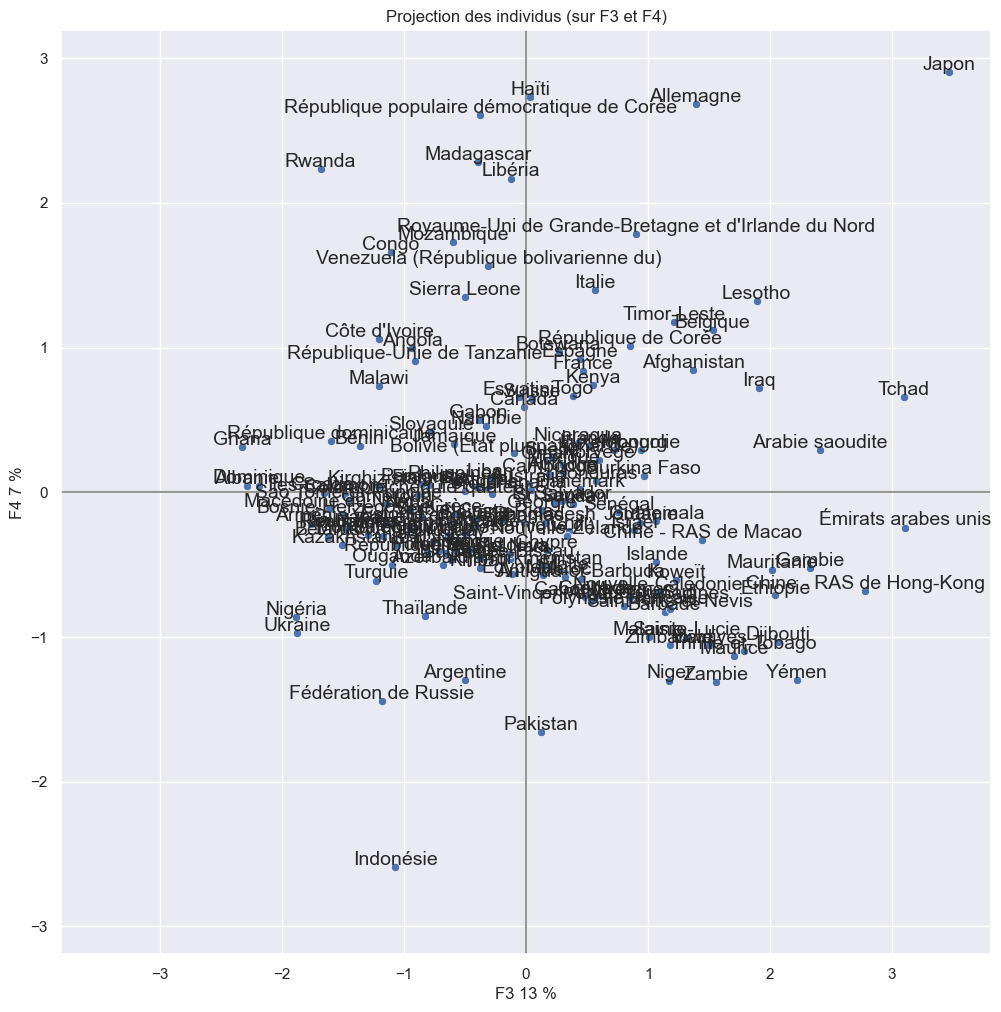

In [42]:
x_y = [2,3]
display_factorial_planes(X_acp_proj, x_y, pca_acp, labels=names_acp, figsize=(12,12))

In [43]:
X_acp_proj = pd.DataFrame(X_acp_proj, columns = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10"])
X_acp_proj[:4]

F1        F2        F3        F4        F5        F6        F7  \
0 -1.021330 -2.466482  1.371544  0.842284 -0.478082  0.044610  0.163052   
1  0.844189 -1.259387  0.869101 -0.741868  0.298440 -0.181962  0.181578   
2 -0.630185  1.479516 -2.288918  0.041554  0.268218 -0.012056  1.719484   
3  0.766535  0.238693 -0.309008  0.024056  0.458538  0.901729  0.298399   

         F8        F9       F10  
0  0.215991 -0.061053 -0.065936  
1  0.195307 -0.028198 -0.034184  
2  0.492939  0.222045  0.037274  
3  0.566158 -0.616155  0.028188

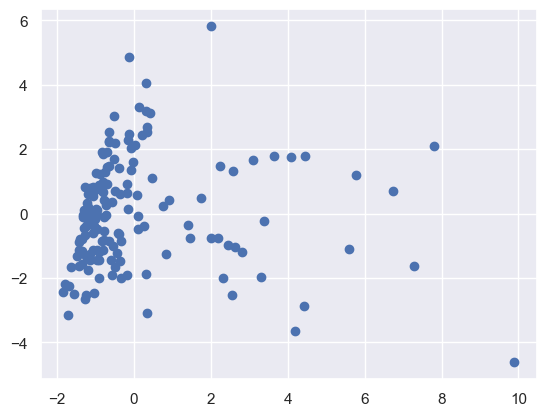

In [44]:
plt.scatter(X_acp_proj.iloc[:, 0], X_acp_proj.iloc[:, 1])
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Classification Ascendante Hiérarchique</h3>
</div>

In [45]:
df_total_cah = df_total.copy()

In [46]:
X_cah = df_total.copy()
X_cah.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%)  
Zone                                     
Afghanistan                   41.445901  
Afrique du Sud                41.017081  
Albanie                       25.956031  
Algérie                       31.827503  
Allemagne                     30.207384

In [47]:
# Calcule des distances entre points et sa méthode
Z_cah = linkage(X_cah, method="ward")
pd.DataFrame(Z_cah)

0      1             2      3
0     53.0  127.0  1.746502e+03    2.0
1     76.0  164.0  9.351868e+03    3.0
2     15.0  114.0  1.033810e+04    2.0
3     96.0  163.0  1.065864e+04    2.0
4    129.0  130.0  1.200083e+04    2.0
..     ...    ...           ...    ...
158   63.0  313.0  7.536211e+07    3.0
159  317.0  319.0  1.305088e+08   14.0
160  320.0  321.0  2.237447e+08  147.0
161  322.0  323.0  2.684457e+08   17.0
162  324.0  325.0  5.994355e+08  164.0

[163 rows x 4 columns]

In [48]:
# Dendrograms

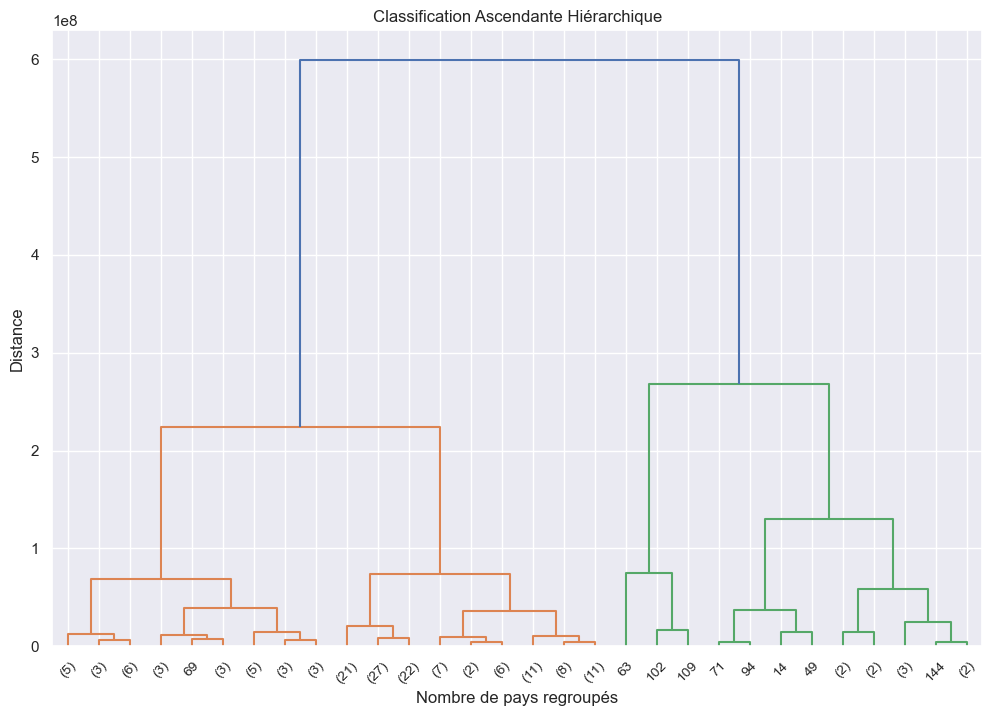

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = dendrogram(Z_cah, truncate_mode="lastp", ax=ax)
plt.title("Classification Ascendante Hiérarchique")
plt.xlabel("Nombre de pays regroupés")
plt.ylabel("Distance")
plt.show()

In [50]:
# Nombre de clusters :

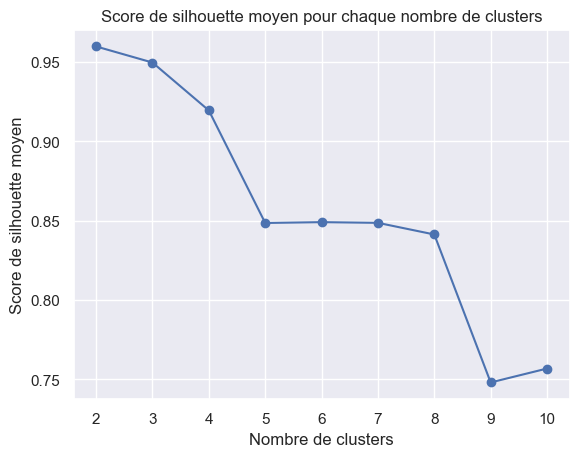

In [51]:
# Effectuer la CAH avec différentes coupes du dendrogramme
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(Z_cah, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(Z_cah, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

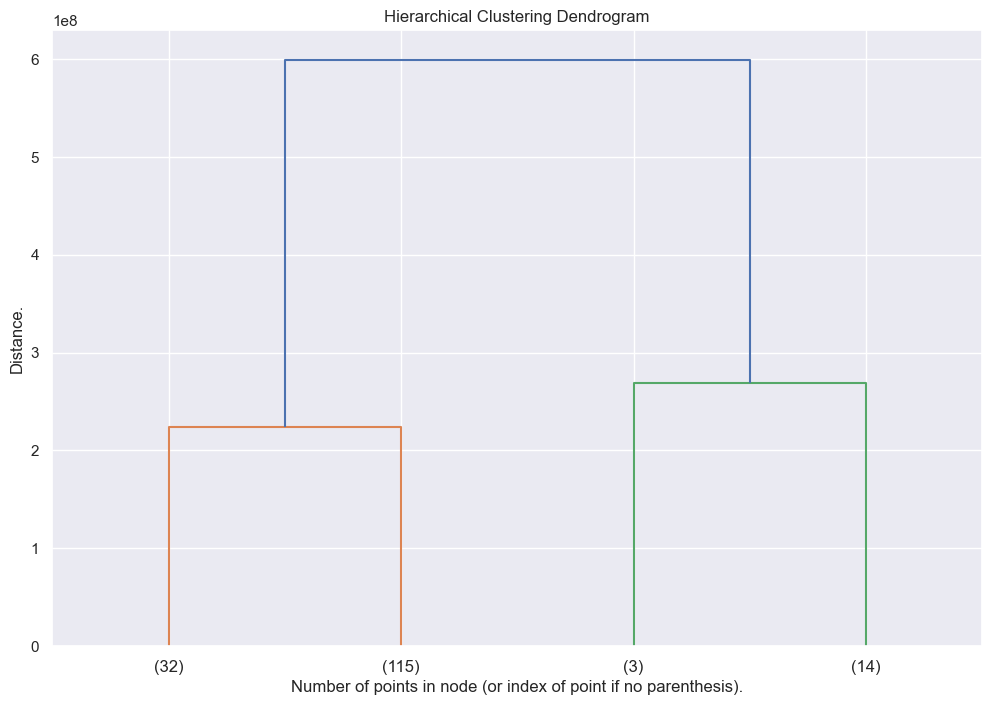

In [52]:
# p=a signifie a clusters
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = dendrogram(Z_cah, p=4, truncate_mode="lastp", ax=ax)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [53]:
# On instancie un estimateur :
cah = AgglomerativeClustering(n_clusters=4, linkage="ward")

In [54]:
# On entraine l'estimateur :
cah.fit(X_cah)

AgglomerativeClustering(n_clusters=4)

In [55]:
cah.labels_

array([3, 3, 1, 3, 0, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 3, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2,
       1, 1, 0, 3, 1, 1, 3, 1, 0, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 3, 1, 1,
       3, 0, 3, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [56]:
lab = {i:j for i,j in enumerate(list("abcde"))}
labels_cah = [lab[i] for i in cah.labels_]
labels_cah[:6]

['d', 'd', 'b', 'd', 'a', 'd']

In [57]:
X_cah["cluster_cah"] = labels_cah
X_cah.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%) cluster_cah  
Zone                                                 
Afghanistan                   41.445901           d  
Afrique du Sud                41.017081           d  
Albanie                       25.956031           b  
Algérie                       31.827503           d  
Allemagne                     30.207384           a

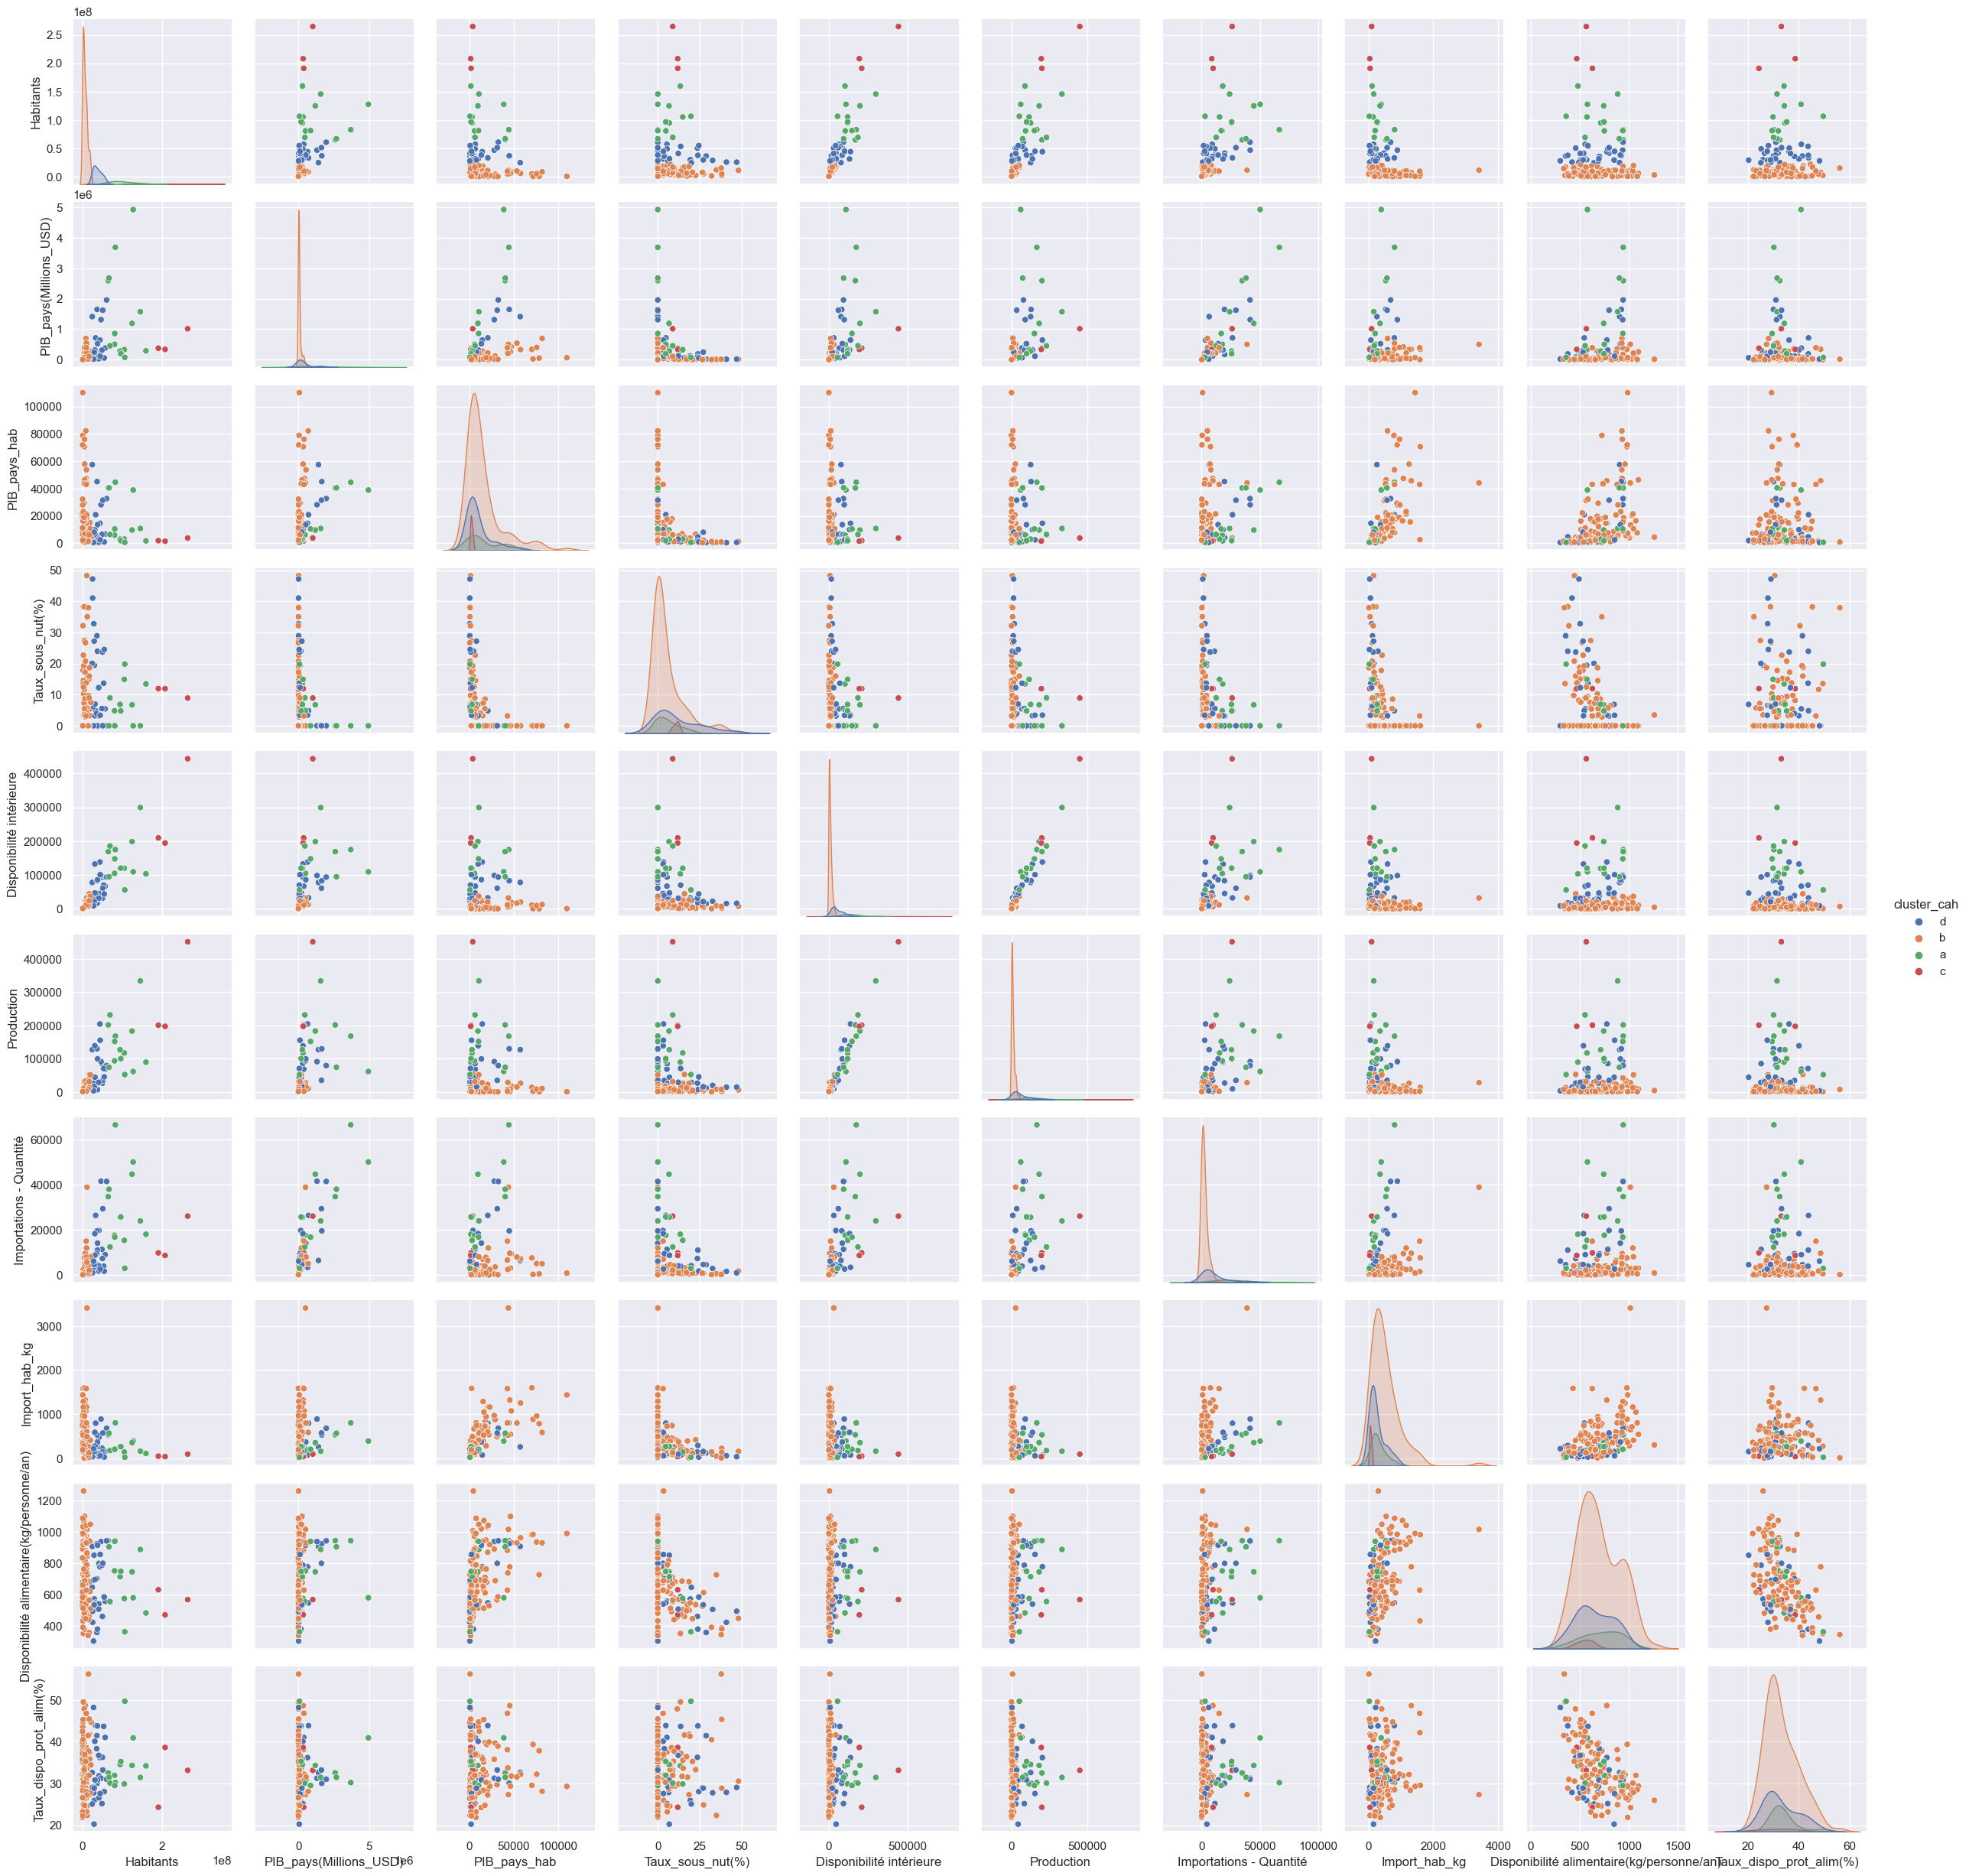

In [58]:
# Analyses bivariées
sns.pairplot(X_cah, hue="cluster_cah")
plt.show()

In [59]:
df_heatmap = X_cah.drop("cluster_cah", axis=1)
correlation_matrix = df_heatmap.corr()

In [60]:
custom_colorscale = [[0, "#3b4cc0"], [0.35, "#EEEEEE"], [1, "#b60b27"]]
fig = px.imshow(correlation_matrix,
                color_continuous_scale=custom_colorscale,
                height=800,
                width=1000,
                text_auto=".2f",
                title="Heatmap",
                labels={"x":"Colonnes", "y":"Lignes"},
                aspect=1)
fig.update_layout(
    xaxis=dict(
        title="",
        tickangle=-90
    ),
    yaxis={"title": ""},
    title_x=0.5,
    title_font=dict(size=24, color="#222222")
)
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">ACP avec les clusters du CAH</h3>
</div>

In [61]:
df_total_ACP["cluster_CAH"] = labels_cah
df_total_ACP.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%) cluster_CAH  
Zone                                                 
Afghanistan                   41.445901           d  
Afrique du Sud                41.017081           d  
Albanie                       25.956031           b  
Algérie                       31.827503           d  
Allemagne                     30.207384           a

In [62]:
x_y = (0,1)
x_y

(0, 1)

In [63]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=labels_cah, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

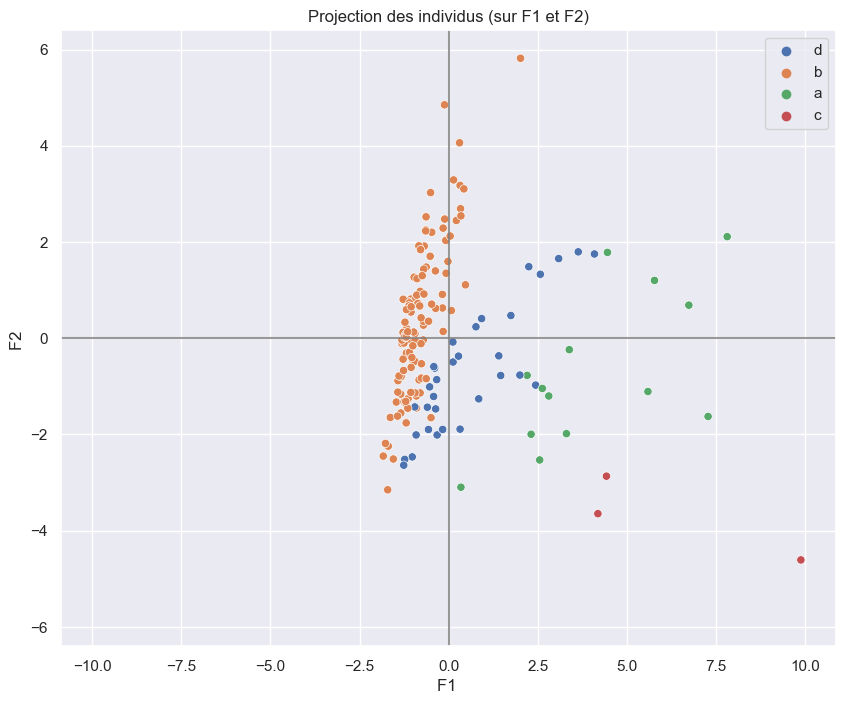

In [64]:
x_y = [0,1]
display_factorial_planes(X_acp_proj, x_y)

In [65]:
# Intervertir les lettres en chiffres pour certains graph
lab_cah = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
labels_cah_num = [lab_cah[i] for i in labels_cah]
labels_cah_num[:6]

[4, 4, 2, 4, 1, 4]

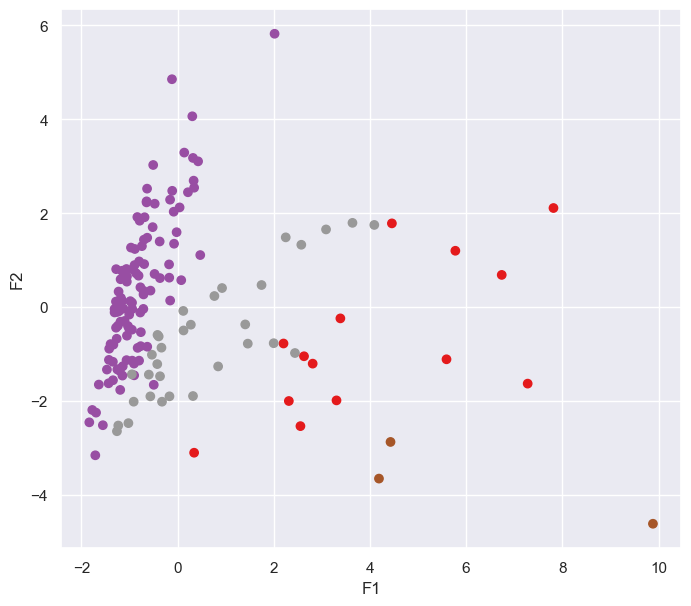

In [66]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_acp_proj.iloc[:, 0], X_acp_proj.iloc[:, 1], c= labels_cah_num, cmap="Set1")

ax.set_xlabel("F1")
ax.set_ylabel("F2")
fig.show()

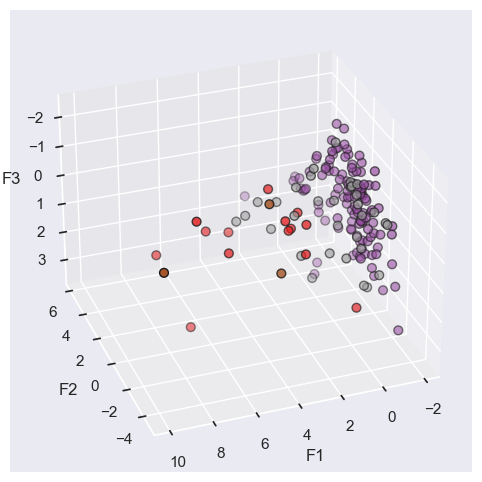

In [67]:
fig= plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_acp_proj.iloc[:, 0],
    X_acp_proj.iloc[:, 1],
    X_acp_proj.iloc[:, 2],
    c=labels_cah_num,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")
fig.show()

In [68]:
fig = px.scatter_3d(x=X_acp_proj.iloc[:,0], y=X_acp_proj.iloc[:,1], z=X_acp_proj.iloc[:, 2],
              color=labels_cah)
fig.show()

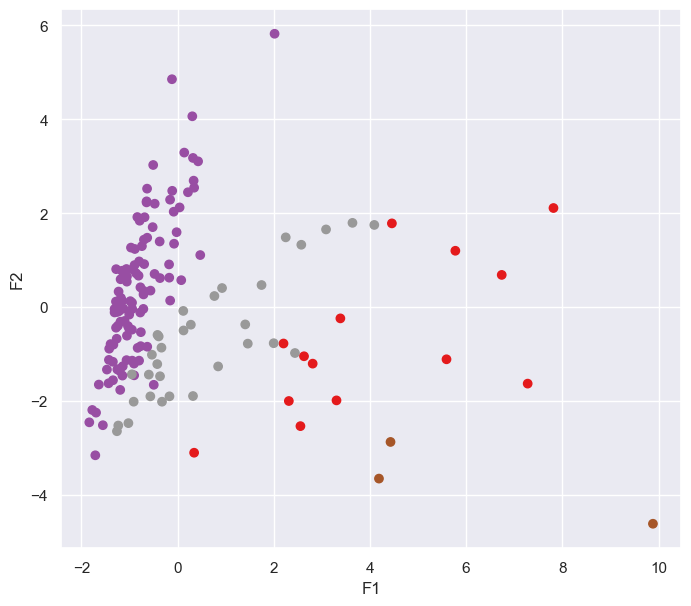

In [69]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_acp_proj.iloc[:, 0], X_acp_proj.iloc[:, 1], c= labels_cah_num, cmap="Set1")

ax.set_xlabel("F1")
ax.set_ylabel("F2")
fig.show()

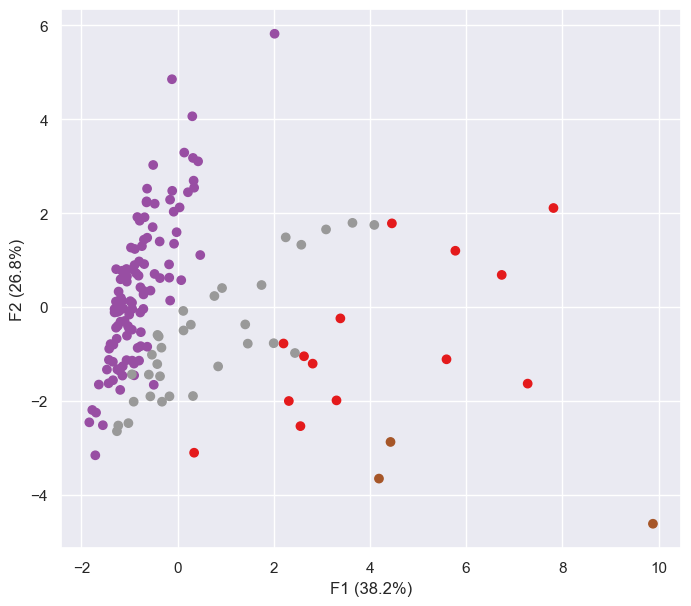

In [70]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_acp_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels_cah_num, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca_acp.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca_acp.explained_variance_ratio_[y],1)))
fig.show()

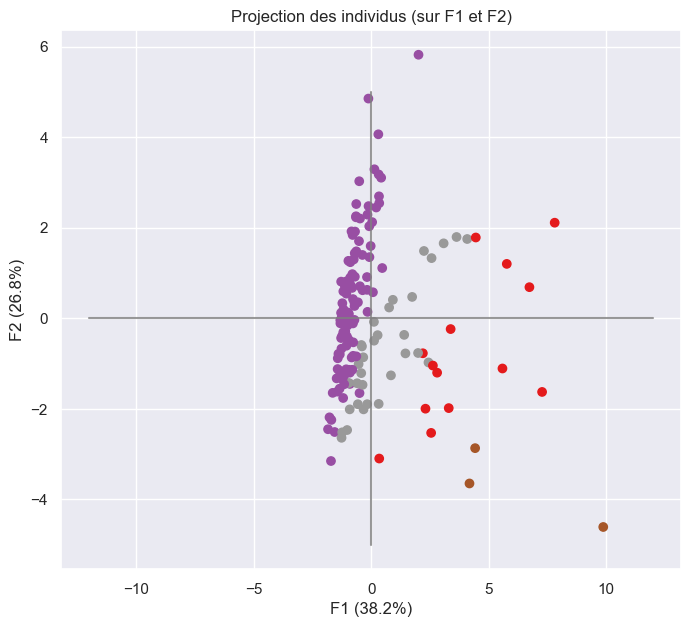

In [71]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_acp_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels_cah_num, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca_acp.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca_acp.explained_variance_ratio_[y],1)))

# affichage des lignes horizontales et verticales
plt.plot([-12, 12], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-5, 5], color='grey', alpha=0.8)

# on rajoute un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
fig.show()

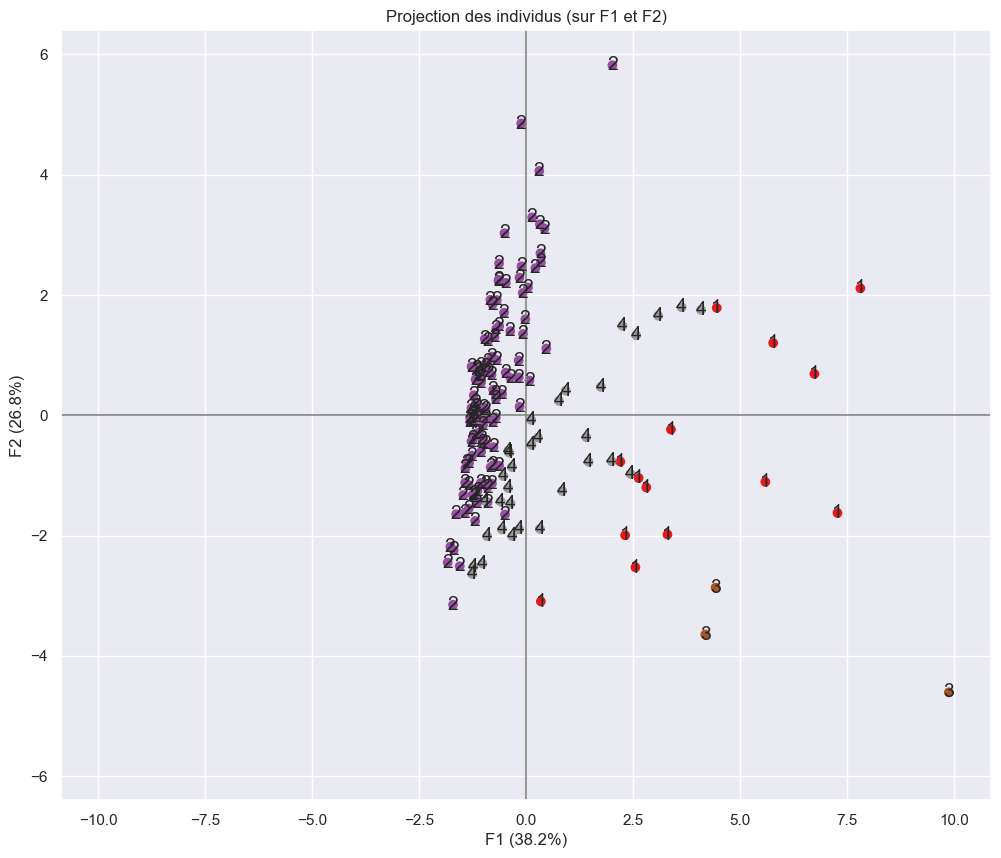

In [72]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

#Transforme notre DataFrame d'origine
X_ = np.array(X_acp_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels_cah_num, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca_acp.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca_acp.explained_variance_ratio_[y],1)))

# valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1

# affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

# on borne x et y 
ax.set_xlim(left= -x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )

# affichage des labels des points
for i,(x,y) in enumerate(X_[:,[x,y]]):
    ax.text(x, y, labels_cah_num[i], fontsize='14', ha='center',va='center') 

plt.show()

<div style="border: 1px solid RGB(180,180,40);" >
<h3 style="margin: auto; padding: 20px; color: RGB(180,180,40); ">K-means</h3>
</div>

In [73]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [74]:
df_total_kmeans = df_total.copy()
df_total_kmeans.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%)  
Zone                                     
Afghanistan                   41.445901  
Afrique du Sud                41.017081  
Albanie                       25.956031  
Algérie                       31.827503  
Allemagne                     30.207384

In [75]:
X_kmeans = df_total_kmeans.values
X_kmeans[:3]

array([[3.62961130e+07, 1.90343028e+04, 5.34020133e+02, 2.89287175e+01,
        1.51390000e+04, 1.16090000e+04, 4.55500000e+03, 1.25495532e+02,
        3.57310000e+02, 4.14459011e+01],
       [5.70097560e+07, 3.80851444e+05, 6.72392858e+03, 5.43766579e+00,
        6.68400000e+04, 6.84550000e+04, 9.02000000e+03, 1.58218534e+02,
        5.56420000e+02, 4.10170809e+01],
       [2.88416900e+06, 1.30197299e+04, 4.52175222e+03, 3.46720320e+00,
        4.87900000e+03, 4.23100000e+03, 8.84000000e+02, 3.06500763e+02,
        1.26049000e+03, 2.59560305e+01]])

In [76]:
X_kmeans = pd.DataFrame(X_kmeans)
X_kmeans.head()

0             1             2          3         4         5  \
0  36296113.0  1.903430e+04    534.020133  28.928718   15139.0   11609.0   
1  57009756.0  3.808514e+05   6723.928582   5.437666   66840.0   68455.0   
2   2884169.0  1.301973e+04   4521.752217   3.467203    4879.0    4231.0   
3  41389189.0  1.700970e+05   4134.936055   3.140917   45365.0   26763.0   
4  82658409.0  3.690849e+06  44670.222282   0.000000  174960.0  167828.0   

         6           7        8          9  
0   4555.0  125.495532   357.31  41.445901  
1   9020.0  158.218534   556.42  41.017081  
2    884.0  306.500763  1260.49  25.956031  
3  19718.0  476.404599   798.71  31.827503  
4  66550.0  805.120747   943.24  30.207384

In [77]:
# Nombre de clusters :

In [78]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_kmeans)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

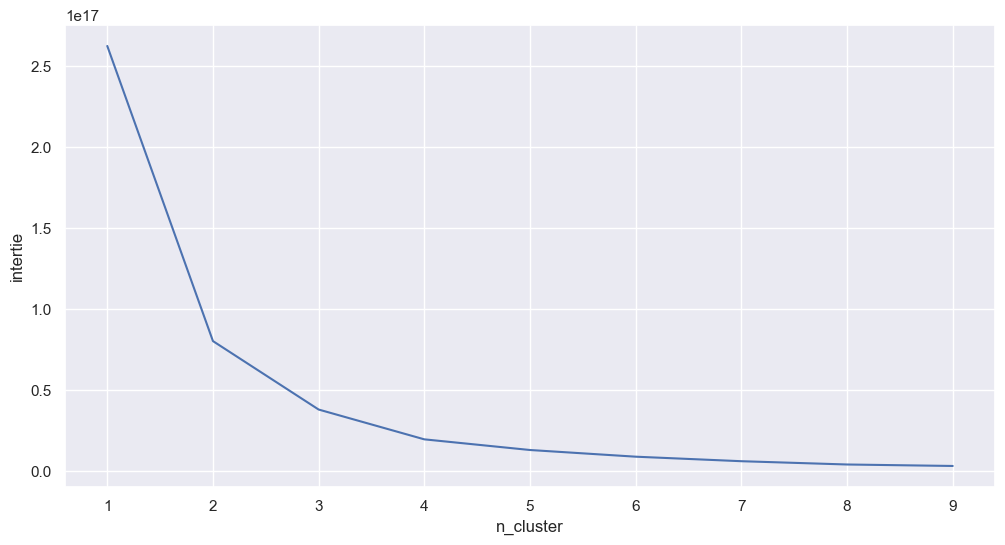

In [79]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [80]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_kmeans)

KMeans(n_clusters=3)

In [81]:
kmeans.labels_

array([2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0])

In [82]:
lab = {i:j for i,j in enumerate(list("abcd"))}
lab

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

In [83]:
labels_kmeans = [lab[i] for i in kmeans.labels_]
labels_kmeans[:10]

['c', 'c', 'a', 'c', 'c', 'a', 'a', 'a', 'c', 'a']

In [84]:
df_total_kmeans["cluster_kmeans"] = labels_kmeans
df_total_kmeans.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%) cluster_kmeans  
Zone                                                    
Afghanistan                   41.445901              c  
Afrique du Sud                41.017081              c  
Albanie                       25.956031              a  
Algérie                       31.827503              c  
Allemagne                     30.207384              c

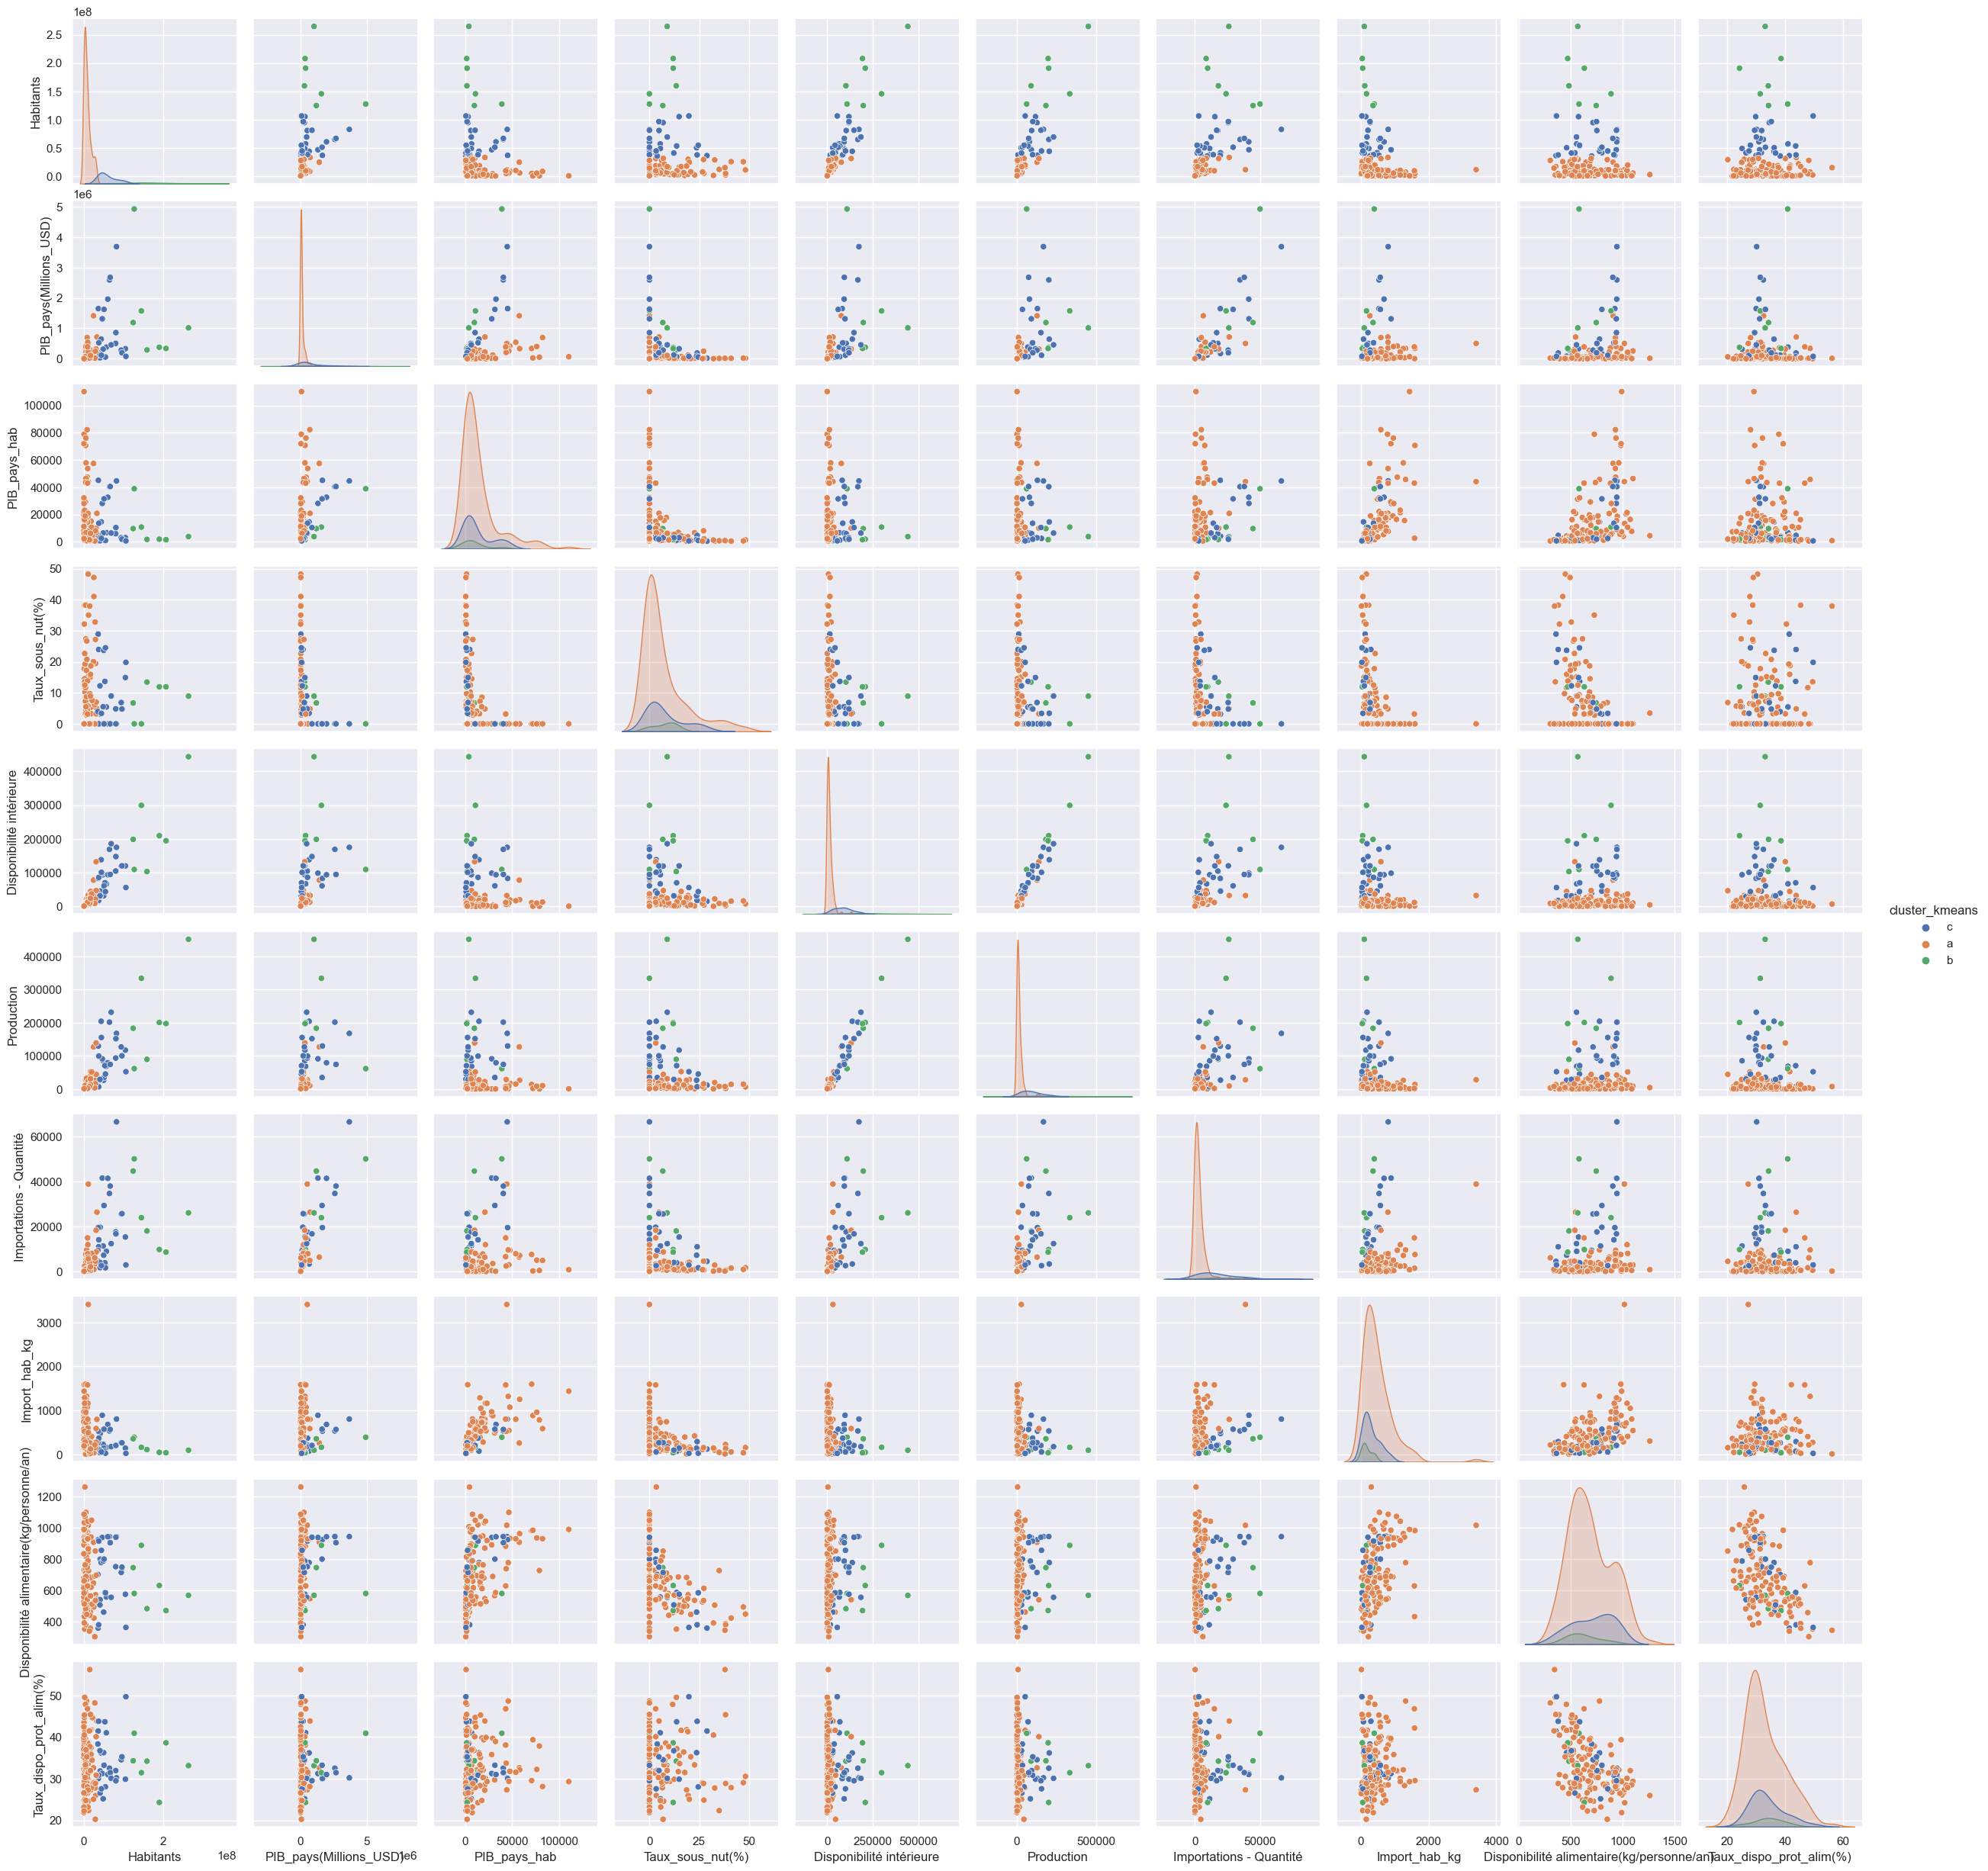

In [85]:
sns.pairplot(df_total_kmeans, hue="cluster_kmeans")
plt.show()

In [86]:
df_heatmap = df_total_kmeans.drop("cluster_kmeans", axis=1)
correlation_matrix = df_heatmap.corr()

In [87]:
custom_colorscale = [[0, "#3b4cc0"], [0.35, "#EEEEEE"], [1, "#b60b27"]]
fig = px.imshow(correlation_matrix,
                color_continuous_scale=custom_colorscale,
                height=600,
                width=800,
                text_auto=".2f",
                title="Heatmap",
                labels={"x":"Colonnes", "y":"Lignes"},
                aspect=1)
fig.update_layout(
    xaxis=dict(
        title="",
        tickangle=-90
    ),
    yaxis={"title": ""},
    title_x=0.5,
    title_font=dict(size=24, color="#222222")
)
fig.show()

In [88]:
df_total_ACP["cluster_kmeans"] = labels_kmeans
df_total_ACP.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%) cluster_CAH cluster_kmeans  
Zone                                                                
Afghanistan                   41.445901           d              c  
Afrique du Sud                41.017081           d              c  
Albanie                       25.956031           b              a  
Algérie                       31.827503           d              c  
Allemagne                     30.207384           a              c

<div style="border: 1px solid RGB(180,180,40);" >
<h3 style="margin: auto; padding: 20px; color: RGB(180,180,40); ">ACP avec les clusters du K-means</h3>
</div>

In [89]:
X_kmeans.head()

0             1             2          3         4         5  \
0  36296113.0  1.903430e+04    534.020133  28.928718   15139.0   11609.0   
1  57009756.0  3.808514e+05   6723.928582   5.437666   66840.0   68455.0   
2   2884169.0  1.301973e+04   4521.752217   3.467203    4879.0    4231.0   
3  41389189.0  1.700970e+05   4134.936055   3.140917   45365.0   26763.0   
4  82658409.0  3.690849e+06  44670.222282   0.000000  174960.0  167828.0   

         6           7        8          9  
0   4555.0  125.495532   357.31  41.445901  
1   9020.0  158.218534   556.42  41.017081  
2    884.0  306.500763  1260.49  25.956031  
3  19718.0  476.404599   798.71  31.827503  
4  66550.0  805.120747   943.24  30.207384

In [90]:
X_acp_proj = pd.DataFrame(X_acp_proj, columns = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10"])
X_acp_proj[:4]

F1        F2        F3        F4        F5        F6        F7  \
0 -1.021330 -2.466482  1.371544  0.842284 -0.478082  0.044610  0.163052   
1  0.844189 -1.259387  0.869101 -0.741868  0.298440 -0.181962  0.181578   
2 -0.630185  1.479516 -2.288918  0.041554  0.268218 -0.012056  1.719484   
3  0.766535  0.238693 -0.309008  0.024056  0.458538  0.901729  0.298399   

         F8        F9       F10  
0  0.215991 -0.061053 -0.065936  
1  0.195307 -0.028198 -0.034184  
2  0.492939  0.222045  0.037274  
3  0.566158 -0.616155  0.028188

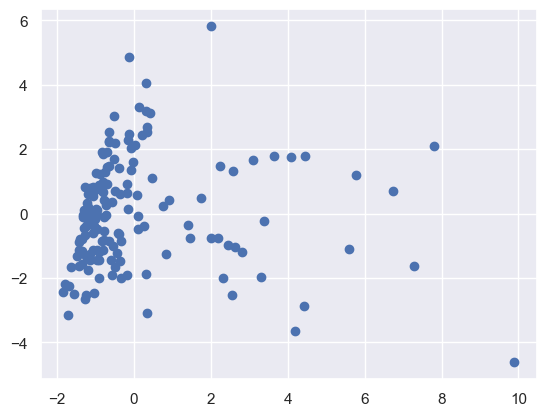

In [91]:
plt.scatter(X_acp_proj.iloc[:, 0], X_acp_proj.iloc[:, 1])
plt.show()

In [92]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=labels_kmeans,
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

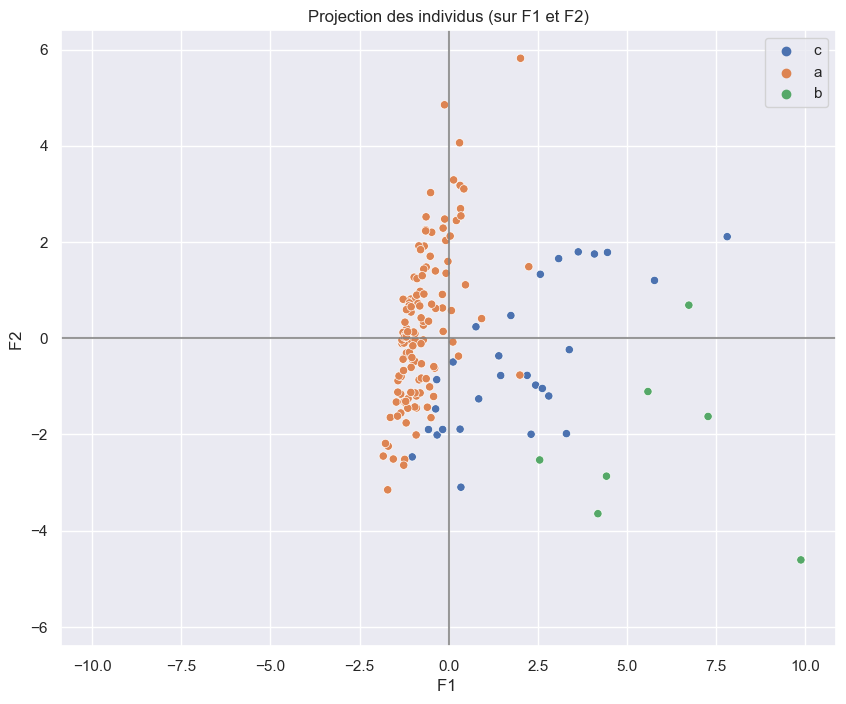

In [93]:
x_y = [0,1]
display_factorial_planes(X_acp_proj, x_y)

In [94]:
lab_kmeans = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
labels_kmeans_num = [lab_kmeans[i] for i in labels_kmeans]
labels_kmeans_num[:6]

[3, 3, 1, 3, 3, 1]

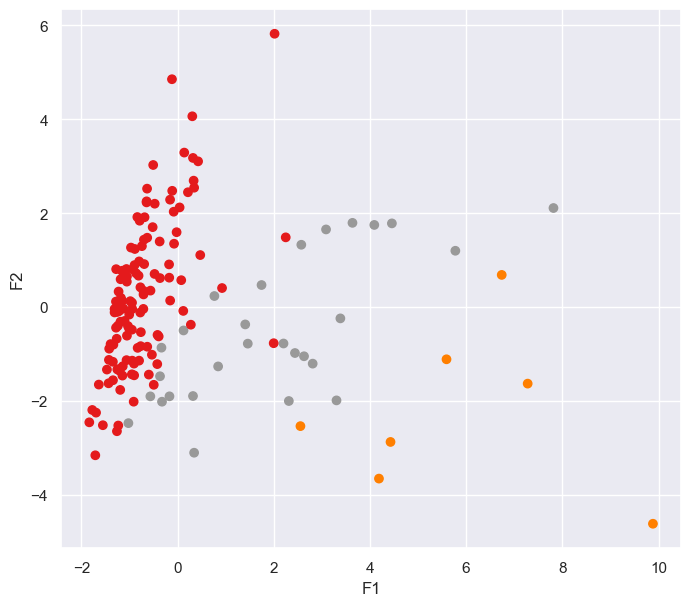

In [95]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_acp_proj.iloc[:, 0], X_acp_proj.iloc[:, 1], c= labels_kmeans_num, cmap="Set1")

ax.set_xlabel("F1")
ax.set_ylabel("F2")
fig.show()

In [96]:
# Ajout des centroïdes
# Enregistrer les centroids :
centroids_kmeans = kmeans.cluster_centers_
centroids_kmeans

array([[8.59902918e+06, 9.18086834e+04, 1.42040910e+04, 6.98281361e+00,
        1.20518140e+04, 1.22503488e+04, 3.01951938e+03, 4.71720975e+02,
        6.84280078e+02, 3.30091844e+01],
       [1.74417996e+08, 1.38759943e+06, 9.79580409e+03, 7.56956077e+00,
        2.22589286e+05, 2.16912000e+05, 2.59185714e+04, 1.74399930e+02,
        6.22745714e+02, 3.38459656e+01],
       [5.95126857e+07, 7.51368425e+05, 1.28249966e+04, 7.57293287e+00,
        8.70699643e+04, 9.08936786e+04, 1.75680357e+04, 2.98687592e+02,
        7.08322143e+02, 3.38568197e+01]])

In [97]:
centroids_scaled_kmeans = scaler_acp.fit_transform(centroids_kmeans)
centroids_scaled_kmeans

array([[-1.04165444, -1.2320282 ,  1.04774255, -1.41419615, -1.09249438,
        -1.12028336, -1.31923293,  1.28592908,  0.34679692, -1.41412549],
       [ 1.34920939,  1.21732923, -1.34647486,  0.70101989,  1.32396309,
         1.30762004,  1.1008855 , -1.15266034, -1.360748  ,  0.69339421],
       [-0.30755495,  0.01469898,  0.29873232,  0.71317626, -0.2314687 ,
        -0.18733668,  0.21834742, -0.13326874,  1.01395108,  0.72073127]])

In [98]:
centroids_proj_kmeans = pca_acp.transform(centroids_scaled_kmeans)
centroids_proj_kmeans = pd.DataFrame(centroids_proj_kmeans, 
                              columns = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10"], 
                              index=["cluster_0", "cluster_1", "cluster_2"])
centroids_proj_kmeans

F1        F2        F3        F4        F5        F6  \
cluster_0 -2.110538  2.435721 -0.988487 -0.711207 -0.479662 -0.005231   
cluster_1  2.255540 -2.766148  0.648932  0.214328  0.744767  0.297030   
cluster_2 -0.145002  0.330427  0.339555  0.496880 -0.265105 -0.291799   

                 F7        F8        F9       F10  
cluster_0 -1.243161  0.083317  0.078503  0.067507  
cluster_1 -0.049075 -0.271084  0.123865 -0.046982  
cluster_2  1.292236  0.187768 -0.202368 -0.020524

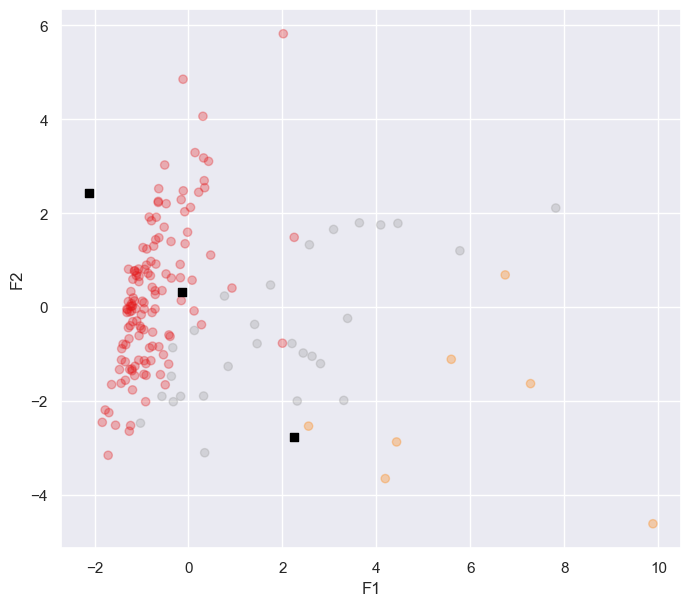

In [99]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_acp_proj.iloc[:, 0], X_acp_proj.iloc[:, 1], c= labels_kmeans_num, cmap="Set1", alpha=0.3)
ax.scatter(centroids_proj_kmeans.iloc[:, 0], centroids_proj_kmeans.iloc[:, 1],  marker="s", c="black" )

ax.set_xlabel("F1")
ax.set_ylabel("F2")
fig.show()

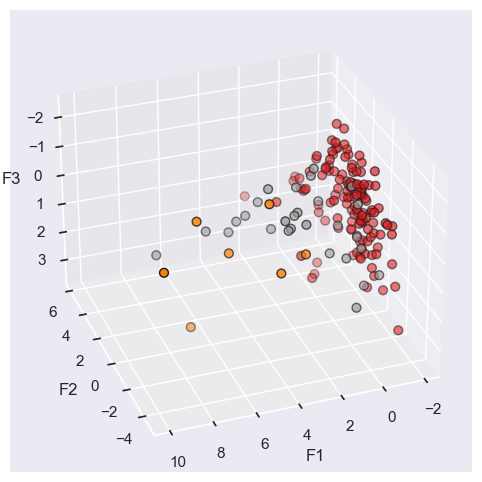

In [100]:
fig= plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    X_acp_proj.iloc[:, 0],
    X_acp_proj.iloc[:, 1],
    X_acp_proj.iloc[:, 2],
    c=labels_kmeans_num,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40)

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")
fig.show()

In [101]:
fig = px.scatter_3d(x=X_acp_proj.iloc[:,0], y=X_acp_proj.iloc[:,1], z=X_acp_proj.iloc[:, 2],
              color=labels_kmeans)
fig.show()

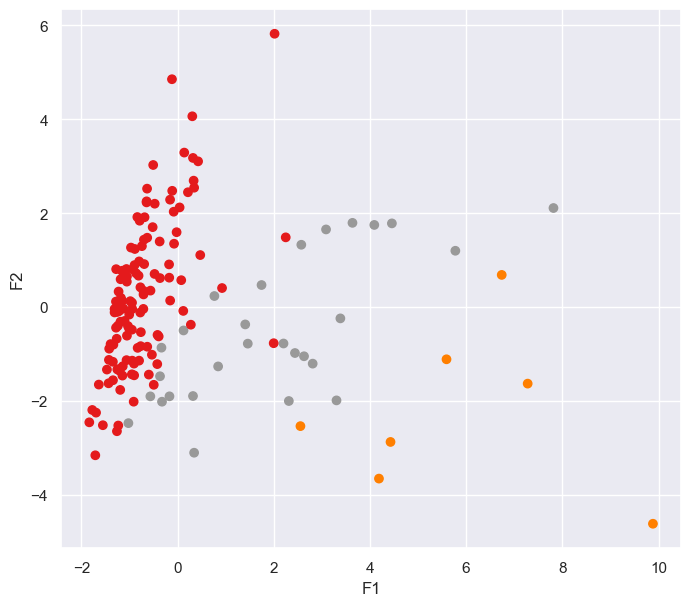

In [102]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.scatter(X_acp_proj.iloc[:, 0], X_acp_proj.iloc[:, 1], c= labels_kmeans_num, cmap="Set1")

ax.set_xlabel("F1")
ax.set_ylabel("F2")
fig.show()

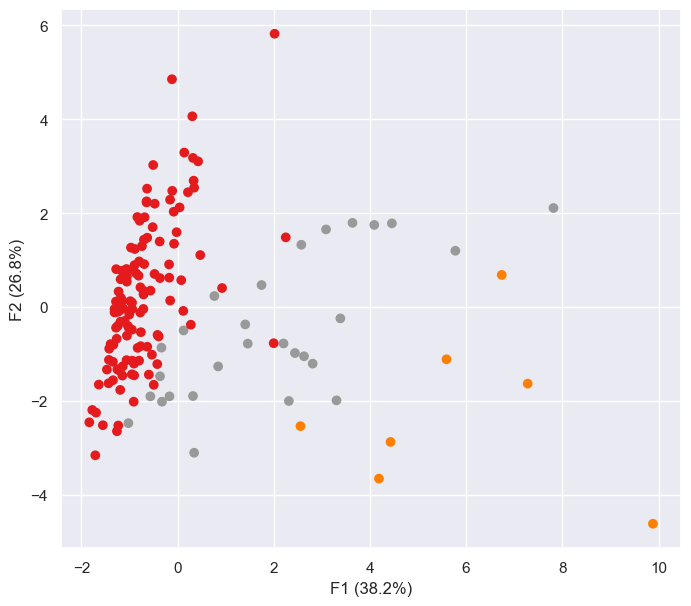

In [103]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_acp_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels_kmeans_num, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca_acp.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca_acp.explained_variance_ratio_[y],1)))
fig.show()

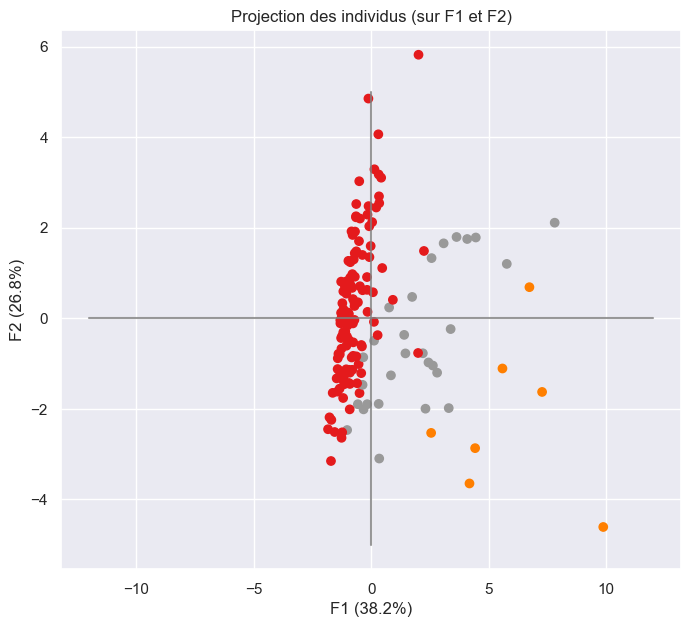

In [104]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

#Transforme notre DataFrame d'origine
X_ = np.array(X_acp_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels_kmeans_num, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca_acp.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca_acp.explained_variance_ratio_[y],1)))

# affichage des lignes horizontales et verticales
plt.plot([-12, 12], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-5, 5], color='grey', alpha=0.8)

# on rajoute un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )
plt.show()

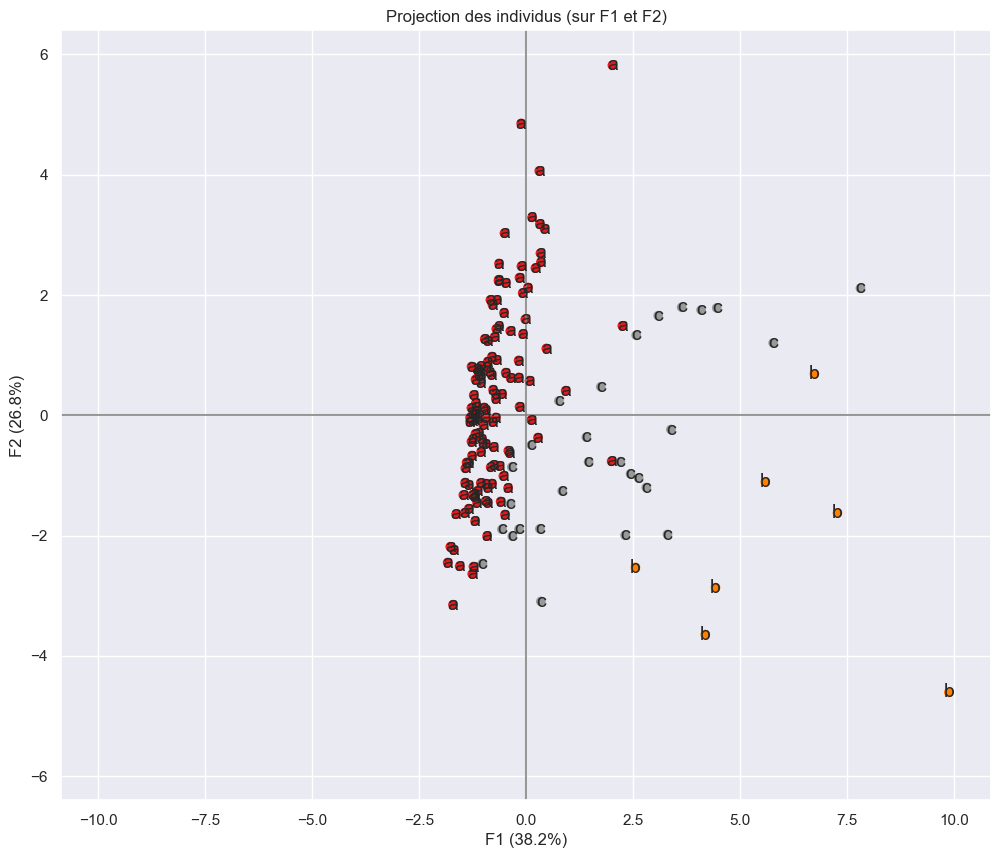

In [105]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

#Transforme notre DataFrame d'origine
X_ = np.array(X_acp_proj)

# On enregistre nos axes x, y
x, y = axis = (0,1 )

# plus besoin d'utiliser iloc
ax.scatter(X_[:, 0], X_[:, 1], c= labels_kmeans_num, cmap="Set1")

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca_acp.explained_variance_ratio_[x],1)))
ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca_acp.explained_variance_ratio_[y],1)))

# valeur x max et y max
x_max = np.abs(X_[:, x]).max() *1.1
y_max = np.abs(X_[:, y]).max() *1.1

# affichage des lignes horizontales et verticales
plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

# on borne x et y 
ax.set_xlim(left= -x_max, right=x_max)
ax.set_ylim(bottom= -y_max, top=y_max)

# un tritre
plt.title("Projection des individus (sur F{} et F{})".format(x+1, y+1), )

# affichage des labels des points
for i,(x,y) in enumerate(X_[:,[x,y]]):
    ax.text(x, y, labels_kmeans[i], fontsize='14', ha='center',va='center') 

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Choix du clustering : CAH</h3>
</div>

In [106]:
# Je trouve les clusters mieux séparés, autant sur le graph F1/F2 que celui en 3D avec F1/F2/F3. Et que 4 clusters me semble le mieux.

In [107]:
df_total_ACP.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%) cluster_CAH cluster_kmeans  
Zone                                                                
Afghanistan                   41.445901           d              c  
Afrique du Sud                41.017081           d              c  
Albanie                       25.956031           b              a  
Algérie                       31.827503           d              c  
Allemagne                     30.207384           a              c

In [108]:
df_total_ACP = df_total_ACP.drop("cluster_kmeans", axis=1)

In [109]:
df_total_ACP["cluster_CAH"].value_counts()

cluster_CAH
b    115
d     32
a     14
c      3
Name: count, dtype: int64

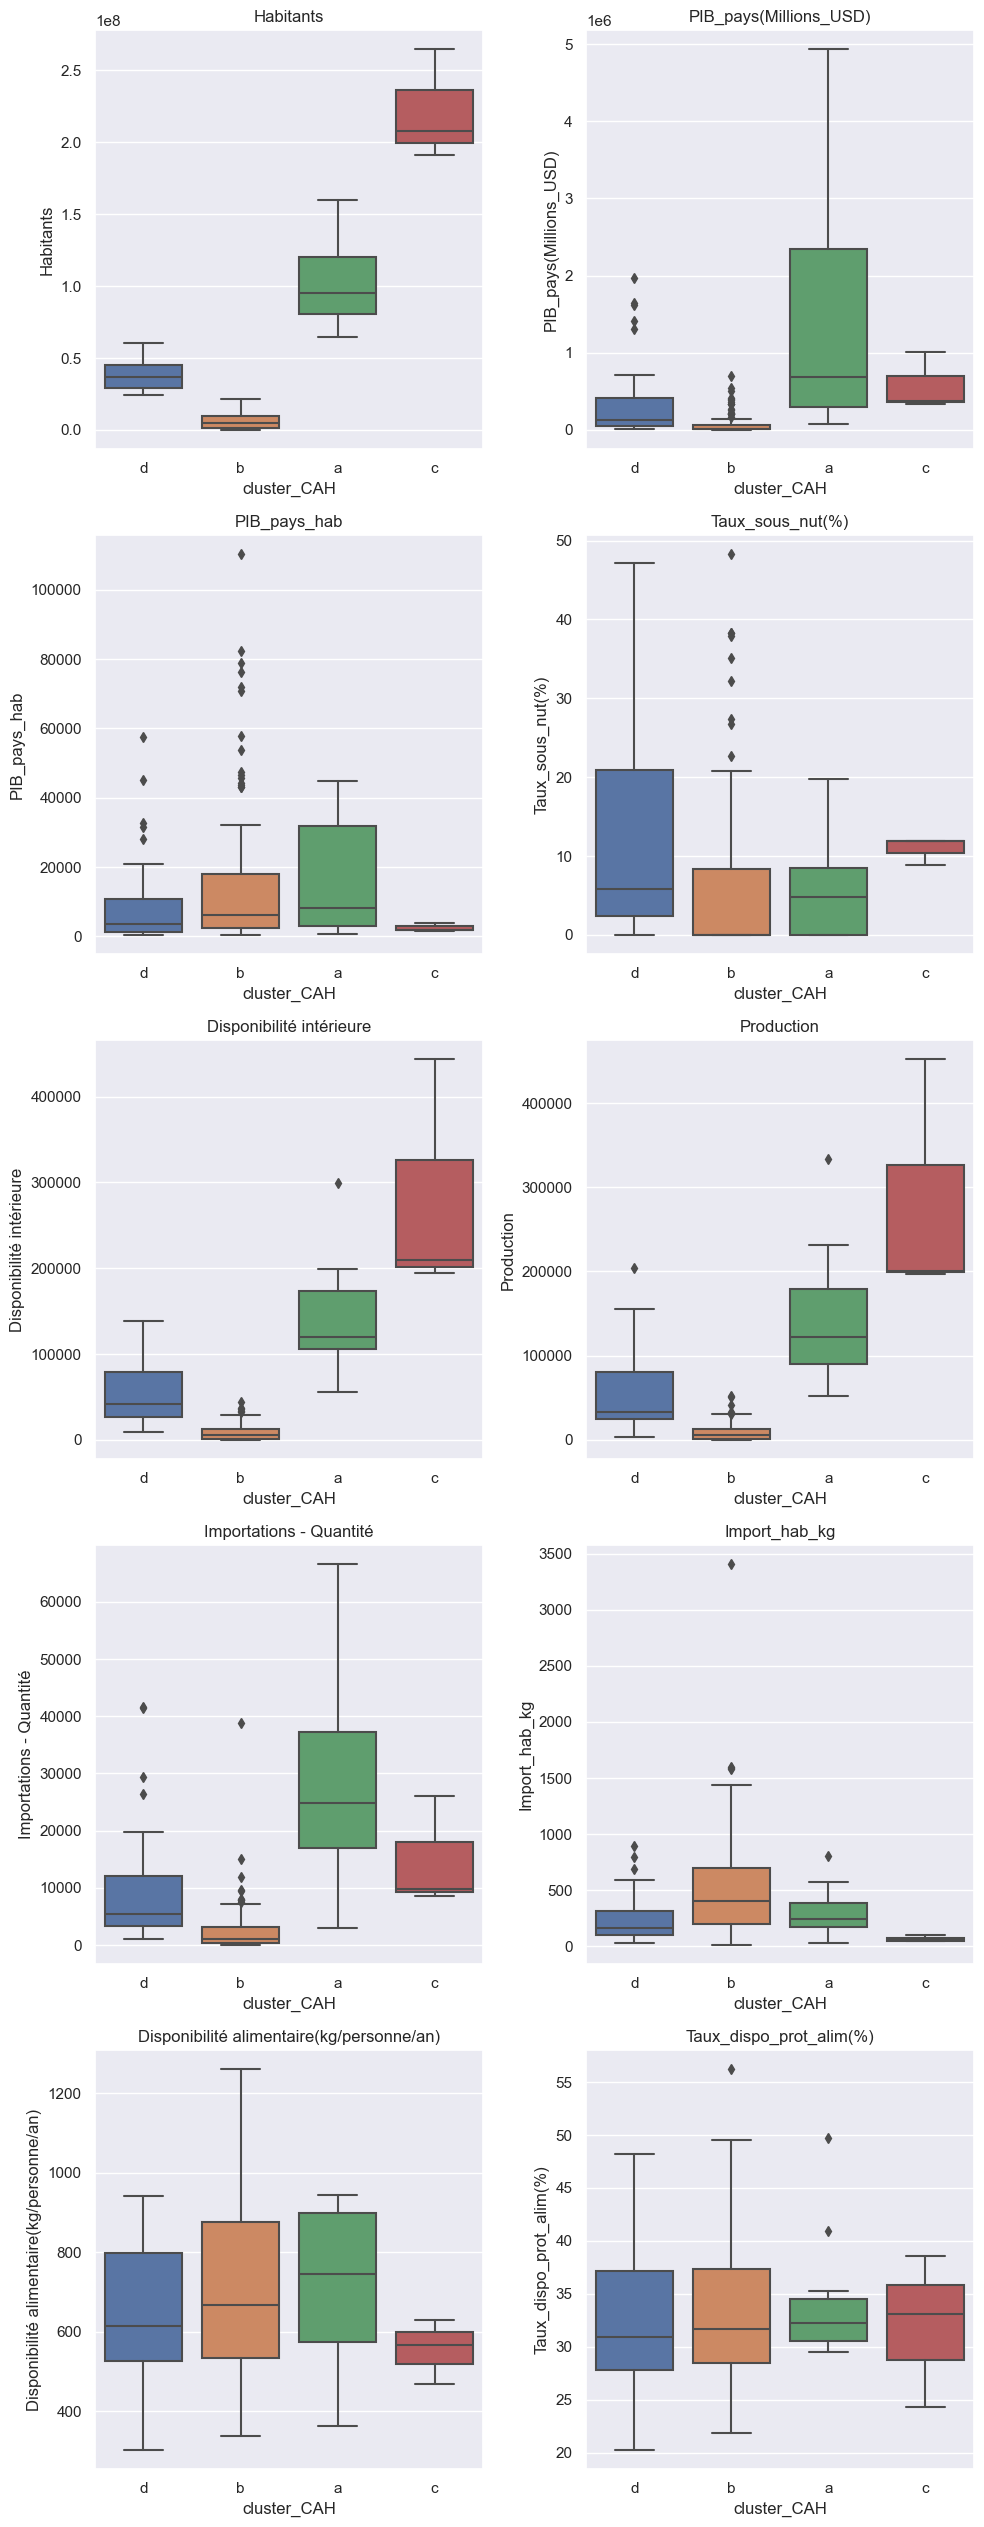

In [110]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_total_ACP.columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1
    
num_cols_moins_cluster = num_cols -1

plt.figure(figsize=(10, 5 * num_rows))
for i, column in enumerate(df_total_ACP.columns[:num_cols_moins_cluster], start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_CAH', y=column, data=df_total_ACP)
    plt.title(column)

plt.tight_layout()
plt.show()

In [111]:
# 3eme groupe (vert, 14 pays) : population moyennement élevée, PIB et PIB hab important donc pays avec richesse, peu de sous-nut, dispo inté et prod moyenne,
# qui importe de grande quantité pour le pays, douc ouvert à l'importation et politique d'importation positive, mais au final
# assez peu par habitant, et où la présence de protéine n'est pas la plus important, donc on peut leur en vendre davantage

In [112]:
#- Notation -------------------------------------------------

In [113]:
df_total_ACP.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%) cluster_CAH  
Zone                                                 
Afghanistan                   41.445901           d  
Afrique du Sud                41.017081           d  
Albanie                       25.956031           b  
Algérie                       31.827503           d  
Allemagne                     30.207384           a

In [114]:
df_total_ACP["note_habitants"] = pd.cut(df_total_ACP["Habitants"],
                                        bins=[-np.inf, df_total_ACP['Habitants'].quantile(0.25), df_total_ACP['Habitants'].quantile(0.50), df_total_ACP['Habitants'].quantile(0.75), df_total_ACP['Habitants'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [115]:
df_total_ACP["note_PIB_pays"] = pd.cut(df_total_ACP["PIB_pays(Millions_USD)"],
                                        bins=[-np.inf, df_total_ACP['PIB_pays(Millions_USD)'].quantile(0.25), df_total_ACP['PIB_pays(Millions_USD)'].quantile(0.50), df_total_ACP['PIB_pays(Millions_USD)'].quantile(0.75), df_total_ACP['PIB_pays(Millions_USD)'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [116]:
df_total_ACP["note_PIB_pays_hab"] = pd.cut(df_total_ACP["PIB_pays_hab"],
                                        bins=[-np.inf, df_total_ACP['PIB_pays_hab'].quantile(0.25), df_total_ACP['PIB_pays_hab'].quantile(0.50), df_total_ACP['PIB_pays_hab'].quantile(0.75), df_total_ACP['PIB_pays_hab'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [117]:
df_total_ACP["note_Taux_sous_nut"] = pd.cut(df_total_ACP["Taux_sous_nut(%)"],
                                        bins=[-np.inf, df_total_ACP['Taux_sous_nut(%)'].quantile(0.25), df_total_ACP['Taux_sous_nut(%)'].quantile(0.50)+10*1e-12, df_total_ACP['Taux_sous_nut(%)'].quantile(0.75), df_total_ACP['Taux_sous_nut(%)'].quantile(1.00), np.inf],
                                        labels=[-1, -2, -3, -4, -5],
                                        right=False)

In [118]:
df_total_ACP["note_Dispo_int"] = pd.cut(df_total_ACP["Disponibilité intérieure"],
                                        bins=[-np.inf, df_total_ACP['Disponibilité intérieure'].quantile(0.25), df_total_ACP['Disponibilité intérieure'].quantile(0.50), df_total_ACP['Disponibilité intérieure'].quantile(0.75), df_total_ACP['Disponibilité intérieure'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [119]:
df_total_ACP["note_Production"] = pd.cut(df_total_ACP["Production"],
                                        bins=[-np.inf, df_total_ACP['PIB_pays(Millions_USD)'].quantile(0.25), df_total_ACP['PIB_pays(Millions_USD)'].quantile(0.50), df_total_ACP['PIB_pays(Millions_USD)'].quantile(0.75), df_total_ACP['PIB_pays(Millions_USD)'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [120]:
df_total_ACP["note_Impor"] = pd.cut(df_total_ACP["Importations - Quantité"],
                                        bins=[-np.inf, df_total_ACP['Production'].quantile(0.25), df_total_ACP['Production'].quantile(0.50), df_total_ACP['Production'].quantile(0.75), df_total_ACP['Production'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [121]:
df_total_ACP["note_Import_hab_kg"] = pd.cut(df_total_ACP["Import_hab_kg"],
                                        bins=[-np.inf, df_total_ACP['Import_hab_kg'].quantile(0.25), df_total_ACP['Import_hab_kg'].quantile(0.50), df_total_ACP['Import_hab_kg'].quantile(0.75), df_total_ACP['Import_hab_kg'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [122]:
df_total_ACP["note_dispo_alim"] = pd.cut(df_total_ACP["Disponibilité alimentaire(kg/personne/an)"],
                                        bins=[-np.inf, df_total_ACP['Disponibilité alimentaire(kg/personne/an)'].quantile(0.25), df_total_ACP['Disponibilité alimentaire(kg/personne/an)'].quantile(0.50), df_total_ACP['Disponibilité alimentaire(kg/personne/an)'].quantile(0.75), df_total_ACP['Disponibilité alimentaire(kg/personne/an)'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [123]:
df_total_ACP["note_Taux_dispo_prot_alim"] = pd.cut(df_total_ACP["Taux_dispo_prot_alim(%)"],
                                        bins=[-np.inf, df_total_ACP['Taux_dispo_prot_alim(%)'].quantile(0.25), df_total_ACP['Taux_dispo_prot_alim(%)'].quantile(0.50), df_total_ACP['Taux_dispo_prot_alim(%)'].quantile(0.75), df_total_ACP['Taux_dispo_prot_alim(%)'].quantile(1.00), np.inf],
                                        labels=[1, 2, 3, 4, 5],
                                        right=False)

In [124]:
colonnes_a_sommer = ["note_habitants","note_PIB_pays","note_PIB_pays_hab","note_Taux_sous_nut","note_Dispo_int","note_Production","note_Impor","note_Import_hab_kg","note_dispo_alim","note_Taux_dispo_prot_alim"]
df_total_ACP["note_totale"] = df_total_ACP[colonnes_a_sommer].sum(axis=1)

In [125]:
df_total_ACP.head()

Habitants  PIB_pays(Millions_USD)  PIB_pays_hab  \
Zone                                                               
Afghanistan     36296113.0            1.903430e+04    534.020133   
Afrique du Sud  57009756.0            3.808514e+05   6723.928582   
Albanie          2884169.0            1.301973e+04   4521.752217   
Algérie         41389189.0            1.700970e+05   4134.936055   
Allemagne       82658409.0            3.690849e+06  44670.222282   

                Taux_sous_nut(%)  Disponibilité intérieure  Production  \
Zone                                                                     
Afghanistan            28.928718                   15139.0     11609.0   
Afrique du Sud          5.437666                   66840.0     68455.0   
Albanie                 3.467203                    4879.0      4231.0   
Algérie                 3.140917                   45365.0     26763.0   
Allemagne               0.000000                  174960.0    167828.0   

                Importations - Quantité  Import_hab_kg  \
Zone                                                     
Afghanistan                      4555.0     125.495532   
Afrique du Sud                   9020.0     158.218534   
Albanie                           884.0     306.500763   
Algérie                         19718.0     476.404599   
Allemagne                       66550.0     805.120747   

                Disponibilité alimentaire(kg/personne/an)  \
Zone                                                        
Afghanistan                                        357.31   
Afrique du Sud                                     556.42   
Albanie                                           1260.49   
Algérie                                            798.71   
Allemagne                                          943.24   

                Taux_dispo_prot_alim(%) cluster_CAH note_habitants  \
Zone                                                                 
Afghanistan                   41.445901           d              4   
Afrique du Sud                41.017081           d              4   
Albanie                       25.956031           b              2   
Algérie                       31.827503           d              4   
Allemagne                     30.207384           a              4   

               note_PIB_pays note_PIB_pays_hab note_Taux_sous_nut  \
Zone                                                                
Afghanistan                2                 1                 -4   
Afrique du Sud             4                 3                 -3   
Albanie                    2                 2                 -3   
Algérie                    3                 2                 -3   
Allemagne                  4                 4                 -2   

               note_Dispo_int note_Production note_Impor note_Import_hab_kg  \
Zone                                                                          
Afghanistan                 3               2          2                  1   
Afrique du Sud              4               3          2                  2   
Albanie                     2               1          1                  2   
Algérie                     4               2          3                  3   
Allemagne                   4               3          4                  4   

               note_dispo_alim note_Taux_dispo_prot_alim  note_totale  
Zone                                                                   
Afghanistan                  1                         4           16  
Afrique du Sud               2                         4           25  
Albanie                      5                         1           15  
Algérie                      3                         3           24  
Allemagne                    4                         2           31

In [126]:
# Top note du cluster

In [127]:
df_total_ACP_a = df_total_ACP[df_total_ACP["cluster_CAH"]=="a"]

In [128]:
df_total_ACP_a.shape

(14, 22)

In [129]:
df_total_ACP_a.head(15)

Habitants  \
Zone                                                              
Allemagne                                            82658409.0   
Bangladesh                                          159685424.0   
France                                               64842509.0   
Fédération de Russie                                145530082.0   
Iran (République islamique d')                       80673883.0   
Japon                                               127502725.0   
Mexique                                             124777324.0   
Philippines                                         105172925.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...   66727461.0   
Thaïlande                                            69209810.0   
Turquie                                              81116450.0   
Viet Nam                                             94600648.0   
Égypte                                               96442591.0   
Éthiopie                                            106399924.0   

                                                    PIB_pays(Millions_USD)  \
Zone                                                                         
Allemagne                                                     3.690849e+06   
Bangladesh                                                    2.889376e+05   
France                                                        2.595151e+06   
Fédération de Russie                                          1.574199e+06   
Iran (République islamique d')                                5.037100e+05   
Japon                                                         4.930837e+06   
Mexique                                                       1.190721e+06   
Philippines                                                   3.284807e+05   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...            2.680148e+06   
Thaïlande                                                     4.563569e+05   
Turquie                                                       8.589886e+05   
Viet Nam                                                      2.813536e+05   
Égypte                                                        1.951353e+05   
Éthiopie                                                      7.679469e+04   

                                                    PIB_pays_hab  \
Zone                                                               
Allemagne                                           44670.222282   
Bangladesh                                           1785.836613   
France                                              40458.149878   
Fédération de Russie                                10822.770083   
Iran (République islamique d')                       5960.707147   
Japon                                               38928.952604   
Mexique                                              9693.330262   
Philippines                                          3077.434432   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...  40568.470503   
Thaïlande                                            6436.790480   
Turquie                                             10464.007788   
Viet Nam                                             2992.071534   
Égypte                                               1917.049576   
Éthiopie                                              709.761008   

                                                    Taux_sous_nut(%)  \
Zone                                                                   
Allemagne                                                   0.000000   
Bangladesh                                                 13.463972   
France                                                      0.000000   
Fédération de Russie                                        0.000000   
Iran (République islamique d')                              4.834278   
Japon                                                       0.000000   
Mexique                                                     6.73199

In [130]:
df_total_ACP_a_top = df_total_ACP_a.sort_values(by="note_totale", ascending=False)

In [131]:
df_total_ACP_a_top.head(15)

Habitants  \
Zone                                                              
Allemagne                                            82658409.0   
France                                               64842509.0   
Japon                                               127502725.0   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...   66727461.0   
Fédération de Russie                                145530082.0   
Mexique                                             124777324.0   
Turquie                                              81116450.0   
Iran (République islamique d')                       80673883.0   
Thaïlande                                            69209810.0   
Viet Nam                                             94600648.0   
Égypte                                               96442591.0   
Philippines                                         105172925.0   
Bangladesh                                          159685424.0   
Éthiopie                                            106399924.0   

                                                    PIB_pays(Millions_USD)  \
Zone                                                                         
Allemagne                                                     3.690849e+06   
France                                                        2.595151e+06   
Japon                                                         4.930837e+06   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...            2.680148e+06   
Fédération de Russie                                          1.574199e+06   
Mexique                                                       1.190721e+06   
Turquie                                                       8.589886e+05   
Iran (République islamique d')                                5.037100e+05   
Thaïlande                                                     4.563569e+05   
Viet Nam                                                      2.813536e+05   
Égypte                                                        1.951353e+05   
Philippines                                                   3.284807e+05   
Bangladesh                                                    2.889376e+05   
Éthiopie                                                      7.679469e+04   

                                                    PIB_pays_hab  \
Zone                                                               
Allemagne                                           44670.222282   
France                                              40458.149878   
Japon                                               38928.952604   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...  40568.470503   
Fédération de Russie                                10822.770083   
Mexique                                              9693.330262   
Turquie                                             10464.007788   
Iran (République islamique d')                       5960.707147   
Thaïlande                                            6436.790480   
Viet Nam                                             2992.071534   
Égypte                                               1917.049576   
Philippines                                          3077.434432   
Bangladesh                                           1785.836613   
Éthiopie                                              709.761008   

                                                    Taux_sous_nut(%)  \
Zone                                                                   
Allemagne                                                   0.000000   
France                                                      0.000000   
Japon                                                       0.000000   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...          0.000000   
Fédération de Russie                                        0.000000   
Mexique                                                     6.731992   
Turquie                                                     0.00000

In [132]:
# Si nous ajoutons la variable distance par rapport à la France, l'Allemagne et le Royaume-Uni sont les pays numéro 1 pour notre exportation